### Table of Contents

### Data analysis (preprocessing, heap's law, zief's law, bigram)

### Word Clouds

### LDA
*  LDA over all years and logistic regression - unigram

* Logistic Regression

Note
Y variable is 1 = cited above median (4), 0 = anything less than 4

In [7]:
import pickle, re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import FreqDistVisualizer
import matplotlib.pyplot as plt
import numpy as np
import spacy
from stargazer.stargazer import Stargazer

# Get the data and check it

In [185]:
# unpickled_df = pd.read_pickle("C:/Users/amt/Documents/0. MSc Tinbergen/block 5. NLP/extracted_data.pkl")
#unpickled_df = pd.read_pickle(r"C:\Users\marco\Desktop\NLP\extracted_data.pkl")
df = pd.read_pickle(r"C:\Users\USER\OneDrive\Documents\Python\NLP\extracted_data.pkl")
df['Cited by'] = df['Cited by'].fillna(0)
df = df.reset_index(drop = True)

In [186]:
#We drop irrelevant data
df = df.drop(1131)
df = df.reset_index(drop = True)

In [237]:
df.to_pickle("C:/Users/USER/OneDrive/Documents/Python/NLP/extracted_data1.pkl")

* Take out the nan values

In [187]:
#describing the citation data

d = df['Cited by'].describe()
d = pd.DataFrame(d).transpose()
print(d.to_latex(index=False))

\begin{tabular}{rrrrrrrr}
\toprule
 count &     mean &        std &  min &  25\% &  50\% &  75\% &    max \\
\midrule
7658.0 & 36.80726 & 135.525199 &  0.0 & 2.25 & 10.0 & 33.0 & 8657.0 \\
\bottomrule
\end{tabular}



In [188]:
d = df['Year'].describe()
d = pd.DataFrame(d).transpose()
print(d.to_latex(index=False))

\begin{tabular}{rrrrrrrr}
\toprule
 count &        mean &      std &    min &    25\% &    50\% &    75\% &    max \\
\midrule
7658.0 & 2009.698616 & 9.443427 & 1958.0 & 2003.0 & 2012.0 & 2018.0 & 2020.0 \\
\bottomrule
\end{tabular}



# Corpus warm-up:

* First, make all words in abstract lower cases
* Create the corpus of abstracts

In [189]:
#lower case and save it as corpus
#suggestion: list index

def column_to_lower(df, column):
    """
        Input: df and a corresponding column
        Output: converted dataframe column 
        Function: Converts all strings in a column of a dataframe to lowercases.
    """
    return df[column].str.lower()

df.loc[:,'Abstract'] = column_to_lower(df, 'Abstract')

corpus = df["Abstract"].tolist()



In [30]:
#check how some values look like
corpus[0]
#type(corpus[0])
#len(corpus)
#1028 abstracts

'this article extends a foucauldian view of power/knowledge to the archetypical knowledge-intensive organization, the scientific research laboratory. although foucault hesitated to extend his analytics of power to the so-called hard sciences, rhetorical and social studies of science provide a foundation for such an extension. the article describes the discursive production of power/knowledge at a "big science" laboratory conducting nuclear fusion research and illuminates a critical incident in which the fusion research "discipline" imposes normative "discipline" on individual scientists and research teams. here scientific knowledge is not solely a product of data and theory but emerges from a discursive formation in which management practices and institutional context frame the relationship between knowledge and power. © 1999 sage publications, inc.'

In [138]:
#to count the amount of words in the entire dataset, also repeating
corpus_all = []

for i in range(0,len(corpus)):
    res = re.findall(r'\w+', str(corpus[i]))
    corpus_all.extend(res)

#corpus_all
#len(corpus_all)
#type(corpus_all)
#print(corpus_all)

In [208]:
#we are adding marketing to our stopwords list
#What kinds of words should we include in our stopwords list?
techstop = []
file = open("techstop.txt", "r") #Ask HyeJin to give you the file. Otherwise, 

for line in file:
    line = line.rstrip('\n')
    techstop.append(line)

file.close()

my_stop_words = text.ENGLISH_STOP_WORDS.union(["marketing", "consumer", "customer", 'consumers', 'elsevi',
                                               'customers',  "ieee", "rights", "reserve", 'rights reserve','science',
                                              'haworth', 'press', 'journal', 'springer', "©", "academy"], techstop)



* Create a list all the unique words in the corpus

In [33]:
#counting unqiue words in coprus

lister = []
for i in corpus_all:
    if i not in lister:
        lister.append(i)
            
#print(lister)
print("There are", len(lister), "unique words in that list")

There are 27957 unique words in that list


* Tokenize and check the words most frequent in the entire corpus

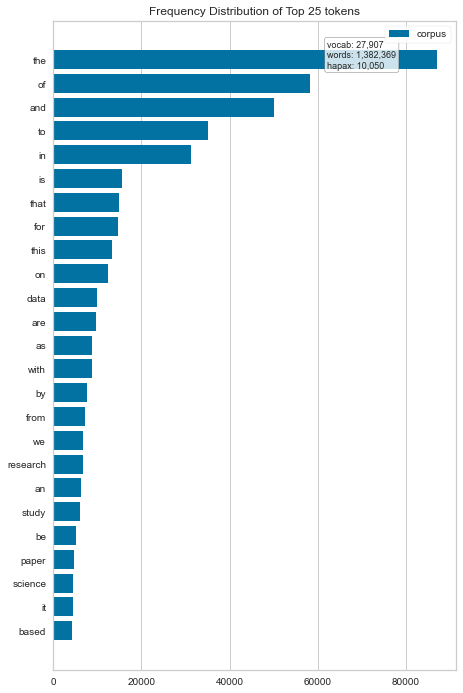

<AxesSubplot:title={'center':'Frequency Distribution of Top 25 tokens'}>

In [34]:
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=25, size= (520, 860))
visualizer.fit(docs)
visualizer.show()

A function that takes as inputs a visualizer object and the number of words to be plotted and returns the **Zipf's law plot**

### Take out english stopwords and check which are the most used words

C:\Users\USER\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['al', 'et', 'forward', 'mentioned', 'straight', 'versa', 'vice'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


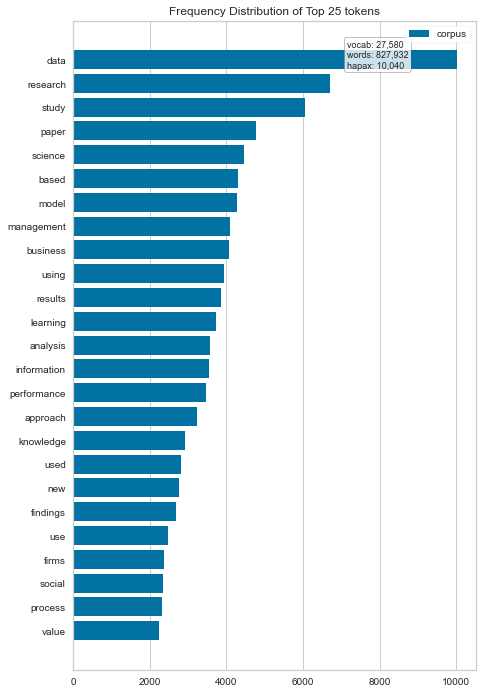

<AxesSubplot:title={'center':'Frequency Distribution of Top 25 tokens'}>

In [35]:
vectorizer = CountVectorizer(stop_words=my_stop_words)
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=25,  size= (520, 860))
visualizer.fit(docs)
visualizer.show()

In [12]:
#list of english stopwords 
#from sklearn.feature_extraction import stop_words
#print(stop_words.ENGLISH_STOP_WORDS)

* Check the most popular words only for some years

In [194]:
#Try to use column than index if possible

#from datetime import datetime, timedelta
#df['coverDate'] = df['coverDate'].astype('datetime64')

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-194-4bf6fcbed0bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['coverDate'] = df['coverDate'].astype('datetime64')


In [36]:
#df = df.set_index('Year')

In [196]:
#df["Year"] = df.index #terrible to add this columns equal to the index, but the LDA part uses it several times


C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [197]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


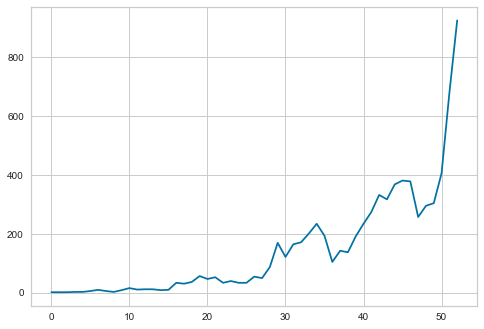

In [41]:
#number of articles published per date (dates with 0 articles are not ont he chart)
plt.plot(df.Abstract.groupby(df.Year).count().tolist())
plt.show()

In [43]:
#plt.plot(df.Year.unique(),df.Abstract.groupby(df.Year).count().tolist())
#plt.show()

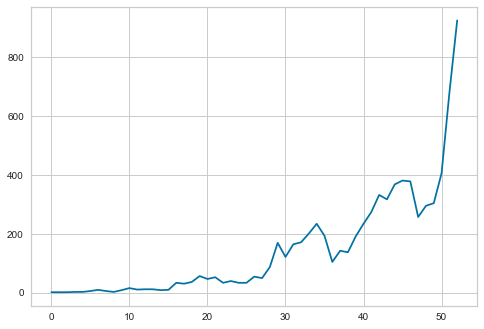

In [45]:
#number of articles published per month (months with 0 articles are not ont he chart)
#the aggregation is done per month. we can see that a lot is published in january, 
#a bit in December, but less at the end of summer
plt.plot(df.Abstract.groupby(df.Year).count().tolist())
plt.show()
#np.unique(df.index.year)

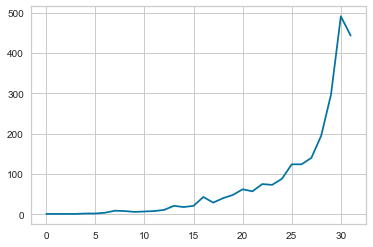

In [44]:
#number of articles published per year, for the years that 
#plt.plot( df.description.groupby(df.index.year).count().tolist())
#ax = plt.gca()
#plt.show()


In [46]:
df.Abstract.groupby(df.Year).count()

Year
1958      1
1961      1
1962      1
1970      2
1971      2
1973      5
1974      9
1975      5
1976      2
1977      8
1978     15
1979     10
1980     11
1981     11
1982      8
1983      9
1984     33
1985     30
1986     36
1987     56
1988     46
1989     52
1990     33
1991     39
1992     33
1993     33
1994     54
1995     49
1996     87
1997    169
1998    121
1999    164
2000    171
2001    201
2002    234
2003    193
2004    104
2005    142
2006    137
2007    191
2008    234
2009    274
2010    332
2011    317
2012    368
2013    381
2014    378
2015    257
2016    295
2017    304
2018    406
2019    679
2020    926
Name: Abstract, dtype: int64

count    7659.000000
mean       36.802716
std       135.516933
min         0.000000
25%         2.000000
50%        10.000000
75%        33.000000
max      8657.000000
Name: Cited by, dtype: float64


(array([2.597e+03, 9.180e+02, 6.150e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00]),
 array([0.0000000e+00, 4.3285000e+00, 8.6570000e+00, ..., 8.6483430e+03,
        8.6526715e+03, 8.6570000e+03]),
 <BarContainer object of 2000 artists>)

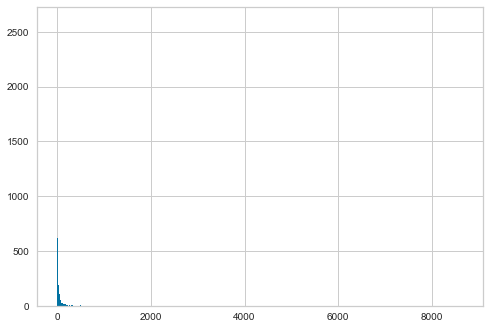

In [50]:
#plot citations
print(df['Cited by'].describe())
#plt.hist(df['Cited by'], bins = 2000)

In [51]:
# analysis on 'year 2021'

#vectorizer = CountVectorizer(stop_words=my_stop_words)
#docs       = vectorizer.fit_transform(corpus[0:171])
#features   = vectorizer.get_feature_names()

#visualizer = FreqDistVisualizer(features=features, n=25,  size= (520, 860))
#visualizer.fit(docs)
#visualizer.show()

In [52]:
#year 2020
#vectorizer = CountVectorizer(stop_words=my_stop_words)
#docs       = vectorizer.fit_transform(corpus[171:546])
#features   = vectorizer.get_feature_names()

#visualizer = FreqDistVisualizer(features=features, n=25,  size= (520, 860))
#visualizer.fit(docs)
#visualizer.show()

In [53]:
#year 2019
#vectorizer = CountVectorizer(stop_words=my_stop_words)
#docs       = vectorizer.fit_transform(corpus[546:775])
#features   = vectorizer.get_feature_names()

#visualizer = FreqDistVisualizer(features=features, n=25,  size= (520, 860))
#visualizer.fit(docs)
#visualizer.show()

----

### Pre-processing:  Lemmatizing & Tokenization

### Creating corpus1 and corpus2

In [209]:
#Select the words that are not numeric and longer than 1 character
#New variable: corpus2

from nltk.tokenize import RegexpTokenizer
import gensim
from gensim.utils import simple_preprocess

#def remove_stopwords(texts):
#    return [[word for word in simple_preprocess(str(doc)) 
#            if word not in my_stop_words] for doc in texts]

corpus_tkn = corpus.copy()

tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(corpus)):
    corpus_tkn[idx] = tokenizer.tokenize(str(corpus[idx]))

corpus2 = [[token for token in doc if not token.isnumeric()] for doc in corpus_tkn]
corpus2 = [[token for token in doc if len(token) > 1] for doc in corpus_tkn]

In [211]:
# Includes bigrams and trigrams to corpus2
# Create corpus1 that is the same of corpus2 but WITHOUT bitrigrams
corpus1 = corpus2.copy()

#bigram = gensim.models.Phrases(corpus2, min_count=100, threshold=100) # higher threshold fewer phrases.
#trigram = gensim.models.Phrases(bigram[corpus2], threshold=100)  
#bigram_mod = gensim.models.phrases.Phraser(bigram)
#trigram_mod = gensim.models.phrases.Phraser(trigram)

def process_words(texts, stop_words=my_stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'], bi = True, tri = True):
    """
    Remove Stopwords, Lemmatization and Form Bigrams and Trigrams [if bi = True, tri = True (by default)]
    If bi and tri are set to false, Bigrams and Trigrams are not added to texts
    
    """
    texts = [[word for word in simple_preprocess(str(doc)) if word not in my_stop_words] for doc in texts]
    
    if bi:
        bigram = gensim.models.Phrases(texts, min_count=100, threshold=100)
        bigram_mod = gensim.models.phrases.Phraser(bigram)
        texts = [bigram_mod[doc] for doc in texts]
    if tri:
        trigram = gensim.models.Phrases(bigram[texts], threshold=100)
        trigram_mod = gensim.models.phrases.Phraser(trigram)
        texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

corpus2 = process_words(corpus2)  # processed Text Data!
corpus1 = process_words(corpus1 , bi = False, tri = False)

In [217]:
from itertools import chain
print(corpus2[1000])
print (len(np.unique(list(chain(*corpus2)))))
print (len(np.unique(list(chain(*corpus1)))))

['generally', 'recognize', 'user', 'attitude', 'important', 'determinant', 'success', 'implementation', 'information', 'user', 'attitude', 'change', 'introduce', 'think', 'important', 'implementation', 'mis', 'ms', 'application', 'base', 'result', 'survey', 'decision', 'support', 'dss', 'study', 'investigate', 'relationship', 'extent', 'change', 'cause', 'user', 'work', 'environment', 'user', 'attitude', 'work', 'relate', 'change', 'measure', 'dss', 'success', 'result', 'indicate', 'dss', 'user', 'satisfied', 'use', 'extensively', 'dss', 'bring', 'change', 'dss', 'result', 'substantial', 'change', 'work', 'environment', 'implication', 'measurement', 'dss', 'success', 'discuss']
20568
20537


In [194]:
#Bigram statistics
bi = []
for word in list(chain(*corpus2)):
    if '_' in word:
        bi.append(word)

count = []
for i in np.unique(bi):
    c = 0
    for j in list(chain(*corpus2)):
        if i == j:
            c += 1
    count.append(c)

count_describe = pd.DataFrame(count)





In [195]:
count_describe = count_describe.describe()
bigram_count = dict(zip(np.unique(bi), count))


In [196]:
import collections

d = collections.Counter(bigram_count)
d.most_common(15)

[('machine_learne', 697),
 ('decision_making', 502),
 ('neural_network', 250),
 ('decision_make', 224),
 ('new_york', 200),
 ('time_serie', 178),
 ('decision_maker', 169),
 ('supply_chain', 160),
 ('long_term', 150),
 ('support_vector', 134),
 ('real_world', 119),
 ('recent_year', 117),
 ('health_care', 116),
 ('cross_sectional', 114),
 ('large_scale', 113)]

In [ ]:
#unigram statistics
uni = []
for word in list(chain(*corpus1)):
    
    uni.append(word)

count1 = []
for i in np.unique(uni):
    c = 0
    for j in list(chain(*corpus1)):
        if i == j:
            c += 1
    count1.append(c)

count1 = pd.DataFrame(count1)
count1_describe = count1.describe()

## Count corpus sentences
Note: if we need the sentences as well, we should extract them 

In [197]:
re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', corpus[0])

['this article extends a foucauldian view of power/knowledge to the archetypical knowledge-intensive organization, the scientific research laborato',
 'although foucault hesitated to extend his analytics of power to the so-called hard sciences, rhetorical and social studies of science provide a foundation for such an extensi',
 'the article describes the discursive production of power/knowledge at a "big science" laboratory conducting nuclear fusion research and illuminates a critical incident in which the fusion research "discipline" imposes normative "discipline" on individual scientists and research tea',
 'here scientific knowledge is not solely a product of data and theory but emerges from a discursive formation in which management practices and institutional context frame the relationship between knowledge and pow',
 '© 1999 sage publications, inc.']

In [198]:
len(re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', corpus[0]))

5

In [199]:
corpus_sentences = []

for i in range(0,len(corpus)):
    #split the current abstract into sentences
    sentences = re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', corpus[i])
    #nr of sentences in current abstract
    nr_of_sentences = len(sentences)
    corpus_sentences.append(nr_of_sentences)

In [200]:
df.loc[:,'nr_sentences_abstract'] = corpus_sentences

In [201]:
df.nr_sentences_abstract.describe()

count    7658.000000
mean        8.210629
std         3.494604
min         2.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        43.000000
Name: nr_sentences_abstract, dtype: float64

In [40]:
#print(df.nr_sentences_abstract.sum(), "total number of sentences")
#print(df.nr_sentences_abstract.median(), "median")
#print(df.nr_sentences_abstract.describe())
#print(df.loc[df['nr_sentences_abstract'] == 46]['description'].values)

In [158]:
#df.loc[df['nr_sentences_abstract'] == 56]['Abstract']
#Note index 1131 is not a relevant data so we drop them



1131    barnard’s overall contribution to authority-fl...
Name: Abstract, dtype: object

In [180]:
#df.loc[df['nr_sentences_abstract'] == 41]['description']
#re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', df.loc[1922]["description"])

### Keywords

In [43]:
keywords = df["authkeywords"].tolist()
print(keywords[1])

Bangladesh | COVID-19 | Entrepreneurial marketing decisions | Opportunity development | Opportunity exploitation | Opportunity recognition | Technology


In [44]:
keywords_paper = [] # List of the keywords associated to each paper (another list)
keywords_all = [] # List of all the keywords (the same keyword can be repeated more than once)

for i in range(0, len(keywords)):
    # Some articles do not have keywords, set it to nan
    if keywords[i] == None:
        res = pd.NA
    else:
        # The keywords are separated by " | ", using it to split them
        res = keywords[i].split(" | ")
        keywords_all.extend(res) # Must be inside the else block, otherwise get error: 'NAType' object is not iterable
    keywords_paper.append(res)

# Checking if okay
print(keywords_all[5000])
print(keywords_paper[50])

text classification
['classification', 'clustering', 'deep learning', 'lexical features', 'online advertisement']


# (Very) Basic sentiment analysis

### TO DO:
- Eliminate "ieee" in pre-processing as they might influence sentiment analysis - done


In [212]:
# Sentiment analysis using textblob
from textblob import TextBlob

subjectivity_list = []
polarity_list =[]
corpus1_as_sentence = []

for abstr in corpus1:
    corpus1_as_sentence.append(" ".join(abstr))

for abstr in corpus1_as_sentence:
    # TextBlob().sentiment returns the sentiment associated with a sentence (or sentences in this case)
    subjectivity_list.append(TextBlob(abstr).sentiment[1]) # [1] because we take only the subjetivity measure
    polarity_list.append(TextBlob(abstr).sentiment[0])# with .sentiment[0] we get an index in the range [-1,+1] that reports the positity/negativity of the sentence

# merge it with the dataframe
df["corpus1"] = corpus1_as_sentence
df["abs_subjectivity"] = subjectivity_list
df["abs_polarity"] = polarity_list
print(max(df["abs_subjectivity"]))
print(min(df["abs_subjectivity"]))

# check if correlated with number of citations
print(np.corrcoef(df["abs_subjectivity"], df['Cited by']))
print(np.corrcoef(df["abs_polarity"], df['Cited by']))

# check one of the most subjective sentences (does not sound that subjective)
print("\nMost subjective sentence according to TextBlog (from raw data):")
print(df[df["abs_subjectivity"] == max(df["abs_subjectivity"])].Abstract.values[1])
print("\nMost subjective sentence according to TextBlog (after data cleaning):")
print(df[df["abs_subjectivity"] == max(df["abs_subjectivity"])].corpus1.values[1])
#print(list((df["abs_subjectivity"] == max(df["abs_subjectivity"]))))

# Check the most negative sentence
print("\nMost negative sentence according to TextBlog:")
print(df[df["abs_polarity"] == min(df["abs_polarity"])].Abstract.values[0])

1.0
0.0
[[ 1.         -0.01665396]
 [-0.01665396  1.        ]]
[[1.         0.00865953]
 [0.00865953 1.        ]]

Most subjective sentence according to TextBlog (from raw data):
this article investigates the interactions among sales management tools and practices used in six key areas of managerial responsibility, namely: organization, selection, training, remuneration, supervision, and evaluation. the results are based principally upon a mail survey of 113 u.k. manufacturing companies. our data suggest that the sales management tools and practices used by the sample companies in the aforementioned managerial areas tend to be interrelated. specificially, the practices pertaining to the organization and selection of the sales force are linked with the training practices employed. also, the selection and the training practices used by manufacturing companies tend to be linked with the evaluation practices. finally, the remuneration practices and policies are linked to the practices pert

In [213]:
# Sentiment analysis using pysentiment2
import pysentiment2 as ps
lm = ps.LM()
list_scores = []
for i in range(0,len(corpus)):
    tokens = lm.tokenize(corpus[i])
    score = lm.get_score(tokens)
    list_scores.append(score)

In [214]:
# create dataframe od pysentiment2 scores with same index of df
df_sentiment = pd.DataFrame.from_dict(list_scores) 
df_sentiment.set_index(df.index, drop = True, inplace = True)

In [215]:
# printing most subjective sentence according to pysentiment2
print(df[df_sentiment.Subjectivity == max(df_sentiment.Subjectivity)].Abstract.values[0])

# check if Subjectivity correlated with number of citations
print("\nCORRELATION:\n", np.corrcoef(df_sentiment.Subjectivity, df['Cited by']))

# check if Polarity correlated with number of citations
print(np.corrcoef(df_sentiment.Polarity, df['Cited by']))

this study investigates the effects of rewards in a research and development (r&d) setting in which employees' inventive efforts lead to patented inventions. pay for performance (pfp) for inventions is associated with two challenges: low-quality inventions may be rewarded (false positives), and high-quality inventions may be overlooked (false negatives). building on previous findings regarding the motivational and informational effects of rewards, we use social identity theory to predict that different types of inventors react differently to such false positive and false negative information. specifically, we hypothesize that pfp that produces false positives has detrimental effects on corporate inventors with a taste for science, who are motivated by scientific prestige, reputation, and intellectual curiosity. the empirical results from survey data related to 3, 995 inventor-patent pairs show that, for this particular group of inventors, false positives are associated with reduced eff

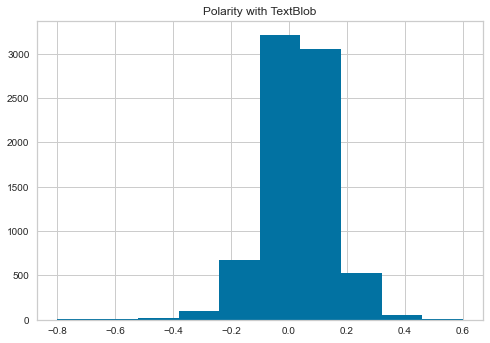

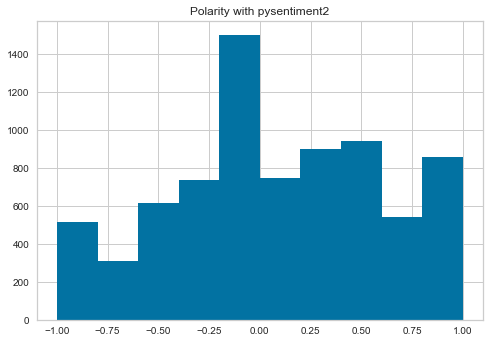

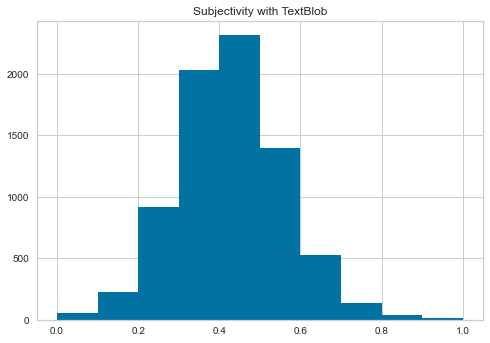

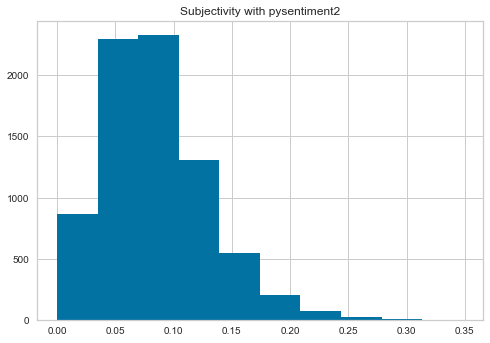

In [216]:
# HISTOGRAMS with the distribution of scores with the 2 packages
plt.hist(df["abs_polarity"])
plt.title("Polarity with TextBlob")
plt.show()
plt.hist(df_sentiment["Polarity"])
plt.title("Polarity with pysentiment2")
plt.show()
plt.hist(df["abs_subjectivity"])
plt.title("Subjectivity with TextBlob")
plt.show()
plt.hist(df_sentiment["Subjectivity"])
plt.title("Subjectivity with pysentiment2")
plt.show()

----

## Word cloud


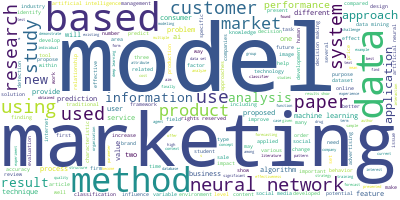

In [50]:
from wordcloud import WordCloud


long_string = ','.join(list(df['Abstract'].values))
#print(long_string[1:100])

wordcloud = WordCloud(background_color = "white", max_words = 5000, contour_width = 3,
                     contour_color = 'steelblue')

wordcloud.generate(long_string)

wordcloud.to_image()

## LDA - bigram + trigram + logistic regression


In [218]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
dictionary2 = Dictionary(corpus2)
dictionary2.filter_extremes(no_below=20, no_above=0.5)
bi_corpus = [dictionary2.doc2bow(doc) for doc in corpus2]

topic = []
perplexity= []
decay = []

num_topics = 20
temp = dictionary2[0]  # This is only to "load" the dictionary.

2


In [224]:
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=bi_corpus,
                                           id2word=dictionary2,
                                           num_topics=k, 
                                           workers = 7,
                                           random_state=100,
                                           chunksize=200,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda1 = CoherenceModel(model=lda_model, texts=corpus2, dictionary=dictionary2, coherence='u_mass')
    coherence_model_lda2 = CoherenceModel(model=lda_model, texts=corpus2, dictionary=dictionary2, coherence='c_v')
    x = coherence_model_lda1.get_coherence()
    y = coherence_model_lda2.get_coherence()
    
    return x, y

In [232]:
from gensim.models import CoherenceModel
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 5
max_topics = 20
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
beta.append('auto')

# Validation sets
num_of_docs = len(bi_corpus)
corpus_sets = bi_corpus

corpus_title = ['100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence_u': [],
                 'Coherence_v': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha va
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    u, v = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary2, 
                                                  k=k, a=a, b=b)
                    print(u, v)

                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence_u'].append(u)
                    model_results['Coherence_v'].append(v)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('./results/lda_tuning_results.csv', index=False)
    pbar.close()





  0%|                                                                                          | 0/540 [00:00<?, ?it/s]



  0%|▏                                                                               | 1/540 [00:18<2:46:12, 18.50s/it]

-1.762011381253981 0.3585986332674802






  0%|▎                                                                               | 2/540 [00:37<2:46:06, 18.52s/it]

-1.7266767236550766 0.3587198810468717






  1%|▍                                                                               | 3/540 [00:54<2:43:42, 18.29s/it]

-1.781985978310623 0.3590854515199473






  1%|▌                                                                               | 4/540 [01:13<2:43:32, 18.31s/it]

-1.7358440734256497 0.3693322062923546






  1%|▋                                                                               | 5/540 [01:32<2:46:27, 18.67s/it]

-1.8054364130848923 0.359689291299692






  1%|▉                                                                               | 6/540 [01:51<2:46:52, 18.75s/it]

-1.778566832541469 0.3662210609925478






  1%|█                                                                               | 7/540 [02:10<2:46:57, 18.79s/it]

-1.7623924858249336 0.3402943866927327






  1%|█▏                                                                              | 8/540 [02:29<2:48:19, 18.98s/it]

-1.7526498143642963 0.3576707101662225






  2%|█▎                                                                              | 9/540 [02:49<2:49:20, 19.13s/it]

-1.824876054178267 0.3699795302731621






  2%|█▍                                                                             | 10/540 [03:08<2:49:05, 19.14s/it]

-1.8034980659790822 0.36655998582808386






  2%|█▌                                                                             | 11/540 [03:27<2:48:33, 19.12s/it]

-1.7689050842541918 0.35366754827573704






  2%|█▊                                                                             | 12/540 [03:46<2:47:25, 19.03s/it]

-1.7689050842541918 0.35366754827573704


  0%|▏                                                                             | 1/540 [05:30<49:32:25, 330.88s/it]




  2%|█▉                                                                             | 13/540 [04:05<2:47:33, 19.08s/it]

-1.683842535662393 0.34106400025790073






  3%|██                                                                             | 14/540 [04:24<2:47:23, 19.09s/it]

-1.7440321603429123 0.35744393387184725






  3%|██▏                                                                            | 15/540 [04:44<2:48:57, 19.31s/it]

-1.7212946583429947 0.36694095460338244






  3%|██▎                                                                            | 16/540 [05:05<2:52:28, 19.75s/it]

-1.7042015474970327 0.37238277308550777






  3%|██▍                                                                            | 17/540 [05:25<2:51:53, 19.72s/it]

-1.7789649489280137 0.35764868022273144






  3%|██▋                                                                            | 18/540 [05:44<2:50:45, 19.63s/it]

-1.7747108716764732 0.35764868022273144






  4%|██▊                                                                            | 19/540 [06:02<2:46:34, 19.18s/it]

-1.7368305042158512 0.35761133646972365






  4%|██▉                                                                            | 20/540 [06:20<2:43:27, 18.86s/it]

-1.731472646789065 0.35657993788931036






  4%|███                                                                            | 21/540 [06:40<2:44:19, 19.00s/it]

-1.6904628464377285 0.3723803451032557






  4%|███▏                                                                           | 22/540 [06:59<2:43:59, 19.00s/it]

-1.7061772581500996 0.37509550098783595






  4%|███▎                                                                           | 23/540 [07:17<2:42:19, 18.84s/it]

-1.6986831136367908 0.3534919358695025






  4%|███▌                                                                           | 24/540 [07:35<2:40:08, 18.62s/it]

-1.698343952303296 0.3534919358695025






  5%|███▋                                                                           | 25/540 [07:53<2:38:59, 18.52s/it]

-1.8723859644999323 0.3357578620573474






  5%|███▊                                                                           | 26/540 [08:12<2:38:50, 18.54s/it]

-1.7773055419950807 0.35053829817394094






  5%|███▉                                                                           | 27/540 [08:31<2:38:47, 18.57s/it]

-1.861249974780679 0.37042141967790776






  5%|████                                                                           | 28/540 [08:49<2:38:42, 18.60s/it]

-1.8465970503018867 0.3646658766479124






  5%|████▏                                                                          | 29/540 [09:07<2:37:13, 18.46s/it]

-1.7488140050924847 0.34884573961594434






  6%|████▍                                                                          | 30/540 [09:26<2:36:18, 18.39s/it]

-1.7509976558067248 0.34884573961594434






  6%|████▌                                                                          | 31/540 [09:44<2:35:25, 18.32s/it]

-1.7896206090985038 0.3729288863174507






  6%|████▋                                                                          | 32/540 [10:02<2:35:28, 18.36s/it]

-1.8276858969326437 0.371410220448768






  6%|████▊                                                                          | 33/540 [10:21<2:35:04, 18.35s/it]

-1.8106960954737024 0.3660315477710111






  6%|████▉                                                                          | 34/540 [10:40<2:36:22, 18.54s/it]

-1.7375479957506115 0.38663200673821246






  6%|█████                                                                          | 35/540 [10:58<2:34:50, 18.40s/it]

-1.7819180675798538 0.37574705209974213






  7%|█████▎                                                                         | 36/540 [11:16<2:33:49, 18.31s/it]

-1.787766981118364 0.3744520639373224






  7%|█████▍                                                                         | 37/540 [11:34<2:33:50, 18.35s/it]

-1.7610240598471998 0.38318934474760846






  7%|█████▌                                                                         | 38/540 [11:53<2:33:55, 18.40s/it]

-1.8237946865546923 0.39183687622251684






  7%|█████▋                                                                         | 39/540 [12:11<2:33:59, 18.44s/it]

-1.7225403740333494 0.3814145725215899






  7%|█████▊                                                                         | 40/540 [12:30<2:34:25, 18.53s/it]

-1.7411852296554757 0.3855606060025556






  8%|█████▉                                                                         | 41/540 [12:49<2:34:20, 18.56s/it]

-1.8286082719849623 0.39235239407931416






  8%|██████▏                                                                        | 42/540 [13:07<2:33:37, 18.51s/it]

-1.8053902539670859 0.3874667062273153






  8%|██████▎                                                                        | 43/540 [13:26<2:35:28, 18.77s/it]

-1.7685960326386665 0.38433006060281644






  8%|██████▍                                                                        | 44/540 [13:45<2:35:42, 18.83s/it]

-1.890667772154103 0.37904489889142273






  8%|██████▌                                                                        | 45/540 [14:04<2:35:59, 18.91s/it]

-1.80948350278534 0.40379589008341643






  9%|██████▋                                                                        | 46/540 [14:24<2:36:25, 19.00s/it]

-1.7884852843975763 0.3973870944968376






  9%|██████▉                                                                        | 47/540 [14:43<2:37:25, 19.16s/it]

-1.8635877608598823 0.37401103386595286






  9%|███████                                                                        | 48/540 [15:02<2:36:38, 19.10s/it]

-1.8100493341524542 0.3783802255562349






  9%|███████▏                                                                       | 49/540 [15:22<2:38:55, 19.42s/it]

-1.7492538243521851 0.38396977827315343






  9%|███████▎                                                                       | 50/540 [15:42<2:40:18, 19.63s/it]

-1.7504472724193991 0.3830823310998386






  9%|███████▍                                                                       | 51/540 [16:02<2:40:15, 19.66s/it]

-1.7731133664766021 0.3914098476615296






 10%|███████▌                                                                       | 52/540 [16:22<2:39:14, 19.58s/it]

-1.7562463585020736 0.3901036007871787






 10%|███████▊                                                                       | 53/540 [16:41<2:39:42, 19.68s/it]

-1.7295317530728858 0.3801216496250208






 10%|███████▉                                                                       | 54/540 [17:01<2:38:31, 19.57s/it]

-1.7282927375766362 0.3801216496250208






 10%|████████                                                                       | 55/540 [17:19<2:35:24, 19.23s/it]

-1.7506274907061228 0.3907761109341586






 10%|████████▏                                                                      | 56/540 [17:38<2:33:57, 19.09s/it]

-1.7016331368942543 0.39649933515236696






 11%|████████▎                                                                      | 57/540 [17:57<2:32:39, 18.96s/it]

-1.703435732600714 0.4002530759839719






 11%|████████▍                                                                      | 58/540 [18:16<2:33:14, 19.08s/it]

-1.732993755947934 0.4011633436210724






 11%|████████▋                                                                      | 59/540 [18:35<2:33:17, 19.12s/it]

-1.6898047517564991 0.38721779520449423






 11%|████████▊                                                                      | 60/540 [18:54<2:31:20, 18.92s/it]

-1.6971077439041105 0.3882053177343139






 11%|████████▉                                                                      | 61/540 [19:12<2:29:53, 18.78s/it]

-1.7491556931403072 0.38109760788693675






 11%|█████████                                                                      | 62/540 [19:31<2:28:41, 18.66s/it]

-1.8769922204886431 0.3812034756980374






 12%|█████████▏                                                                     | 63/540 [19:49<2:27:51, 18.60s/it]

-1.799295983373498 0.3932381349681766






 12%|█████████▎                                                                     | 64/540 [20:07<2:27:22, 18.58s/it]

-1.8054229578190402 0.4052581624303797






 12%|█████████▌                                                                     | 65/540 [20:26<2:27:03, 18.58s/it]

-1.8070122604904093 0.38088069078904835






 12%|█████████▋                                                                     | 66/540 [20:45<2:27:24, 18.66s/it]

-1.8067738216423503 0.37861553197684783






 12%|█████████▊                                                                     | 67/540 [21:03<2:26:54, 18.64s/it]

-1.7935051876683683 0.3897756604089894






 13%|█████████▉                                                                     | 68/540 [21:22<2:26:45, 18.66s/it]

-1.8673017237806018 0.369336296174085






 13%|██████████                                                                     | 69/540 [21:41<2:26:37, 18.68s/it]

-1.8695785622211505 0.3841089202272802






 13%|██████████▏                                                                    | 70/540 [21:59<2:25:29, 18.57s/it]

-1.7997817092554362 0.4012878139524974






 13%|██████████▍                                                                    | 71/540 [22:18<2:25:10, 18.57s/it]

-1.8581117141670742 0.37827851593172573






 13%|██████████▌                                                                    | 72/540 [22:37<2:26:34, 18.79s/it]

-1.8623387587661338 0.37827851593172573






 14%|██████████▋                                                                    | 73/540 [22:56<2:26:08, 18.78s/it]

-1.687285616889825 0.36752854622224124






 14%|██████████▊                                                                    | 74/540 [23:15<2:25:44, 18.77s/it]

-1.7559000743910549 0.36834132015729687






 14%|██████████▉                                                                    | 75/540 [23:33<2:25:09, 18.73s/it]

-1.7350016072586738 0.36205535022511975






 14%|███████████                                                                    | 76/540 [23:52<2:24:36, 18.70s/it]

-1.758171480027922 0.3649177370979188






 14%|███████████▎                                                                   | 77/540 [24:11<2:24:42, 18.75s/it]

-1.8178266779804366 0.3539763078455328






 14%|███████████▍                                                                   | 78/540 [24:30<2:25:28, 18.89s/it]

-1.7158926614175447 0.3599847433237424






 15%|███████████▌                                                                   | 79/540 [24:50<2:26:49, 19.11s/it]

-1.7145215846898798 0.3729415304764392






 15%|███████████▋                                                                   | 80/540 [25:09<2:26:54, 19.16s/it]

-1.7717687517450162 0.36532262266450355






 15%|███████████▊                                                                   | 81/540 [25:29<2:29:47, 19.58s/it]

-1.9019896604684574 0.36511046812543196






 15%|███████████▉                                                                   | 82/540 [25:49<2:29:21, 19.57s/it]

-1.856771364760166 0.36909329476261504






 15%|████████████▏                                                                  | 83/540 [26:08<2:28:36, 19.51s/it]

-1.769122960075345 0.3698583443307314






 16%|████████████▎                                                                  | 84/540 [26:28<2:28:49, 19.58s/it]

-1.7706211303815549 0.3698583443307314






 16%|████████████▍                                                                  | 85/540 [26:48<2:28:15, 19.55s/it]

-1.7840560915122374 0.37636806415836954






 16%|████████████▌                                                                  | 86/540 [27:07<2:27:40, 19.52s/it]

-1.7979134807105102 0.3681966285953203






 16%|████████████▋                                                                  | 87/540 [27:27<2:27:28, 19.53s/it]

-1.7949576071394946 0.37216501224271564






 16%|████████████▊                                                                  | 88/540 [27:46<2:26:58, 19.51s/it]

-1.8285338690978443 0.3745213111882144






 16%|█████████████                                                                  | 89/540 [28:05<2:26:09, 19.45s/it]

-1.7463574759403777 0.3707914637929434






 17%|█████████████▏                                                                 | 90/540 [28:25<2:26:23, 19.52s/it]

-1.7463574759403777 0.3707914637929434






 17%|█████████████▎                                                                 | 91/540 [28:45<2:26:27, 19.57s/it]

-1.82760099331555 0.3793688274287491






 17%|█████████████▍                                                                 | 92/540 [29:04<2:26:09, 19.57s/it]

-1.8381267115246642 0.3832754250252598






 17%|█████████████▌                                                                 | 93/540 [29:23<2:23:45, 19.30s/it]

-1.8105442522499964 0.37921019102647957






 17%|█████████████▊                                                                 | 94/540 [29:42<2:22:10, 19.13s/it]

-1.8259157498851215 0.3845310499043003






 18%|█████████████▉                                                                 | 95/540 [30:00<2:20:08, 18.90s/it]

-1.796272557363491 0.37845527029150927






 18%|██████████████                                                                 | 96/540 [30:18<2:18:48, 18.76s/it]

-1.7967594916184788 0.37845527029150927






 18%|██████████████▏                                                                | 97/540 [30:38<2:20:32, 19.04s/it]

-1.7006553859572033 0.37171759316574077






 18%|██████████████▎                                                                | 98/540 [30:57<2:19:06, 18.88s/it]

-1.75163414935635 0.3651623094314259






 18%|██████████████▍                                                                | 99/540 [31:15<2:18:06, 18.79s/it]

-1.7295850409122948 0.36115103192058623






 19%|██████████████▍                                                               | 100/540 [31:34<2:17:16, 18.72s/it]

-1.7562879423514859 0.35969179524623734






 19%|██████████████▌                                                               | 101/540 [31:52<2:16:35, 18.67s/it]

-1.7285948704459104 0.3628263359713862






 19%|██████████████▋                                                               | 102/540 [32:11<2:16:27, 18.69s/it]

-1.7064151043317841 0.36026712217962276






 19%|██████████████▉                                                               | 103/540 [32:31<2:17:48, 18.92s/it]

-1.7202151459568658 0.37160501869249707






 19%|███████████████                                                               | 104/540 [32:50<2:17:47, 18.96s/it]

-1.7577276262224302 0.3742725544213457






 19%|███████████████▏                                                              | 105/540 [33:08<2:16:53, 18.88s/it]

-1.7478816595284914 0.3655989872210232






 20%|███████████████▎                                                              | 106/540 [33:27<2:16:24, 18.86s/it]

-1.7570811991276432 0.36045640416865726






 20%|███████████████▍                                                              | 107/540 [33:46<2:15:45, 18.81s/it]

-1.8332643721359756 0.3661430341190563






 20%|███████████████▌                                                              | 108/540 [34:04<2:15:06, 18.77s/it]

-1.8354304599850357 0.3661430341190563






 20%|███████████████▋                                                              | 109/540 [34:24<2:15:25, 18.85s/it]

-1.8037068848803723 0.3685420179761857






 20%|███████████████▉                                                              | 110/540 [34:43<2:17:05, 19.13s/it]

-1.7870041984674905 0.3884695645413334






 21%|████████████████                                                              | 111/540 [35:02<2:16:41, 19.12s/it]

-1.7929199316480695 0.3933597420902023






 21%|████████████████▏                                                             | 112/540 [35:22<2:18:09, 19.37s/it]

-1.7543473045976663 0.391717566589226






 21%|████████████████▎                                                             | 113/540 [35:42<2:18:02, 19.40s/it]

-1.758257063889936 0.3734583125104114






 21%|████████████████▍                                                             | 114/540 [36:01<2:17:14, 19.33s/it]

-1.7677111854216212 0.37412079508281404






 21%|████████████████▌                                                             | 115/540 [36:21<2:17:56, 19.47s/it]

-1.8744091192762133 0.3728129497529993






 21%|████████████████▊                                                             | 116/540 [36:41<2:20:10, 19.84s/it]

-1.7961599022766719 0.38381280567331877






 22%|████████████████▉                                                             | 117/540 [37:01<2:19:43, 19.82s/it]

-1.7545728300808694 0.3750798492535169






 22%|█████████████████                                                             | 118/540 [37:21<2:19:27, 19.83s/it]

-1.759392415591342 0.38488114287450936






 22%|█████████████████▏                                                            | 119/540 [37:41<2:18:53, 19.80s/it]

-1.8456327576173335 0.3736916955530393






 22%|█████████████████▎                                                            | 120/540 [38:01<2:18:29, 19.79s/it]

-1.8456327576173335 0.3736916955530393






 22%|█████████████████▍                                                            | 121/540 [38:20<2:18:12, 19.79s/it]

-1.8468289856280191 0.38157800910678263






 23%|█████████████████▌                                                            | 122/540 [38:41<2:20:06, 20.11s/it]

-1.8331553780328929 0.3919885293428609






 23%|█████████████████▊                                                            | 123/540 [39:01<2:19:14, 20.03s/it]

-1.8212093968286884 0.39169307767896033






 23%|█████████████████▉                                                            | 124/540 [39:21<2:18:25, 19.96s/it]

-1.8239928694055998 0.39231931167099376






 23%|██████████████████                                                            | 125/540 [39:41<2:17:41, 19.91s/it]

-1.8508877476203305 0.3817521193159318






 23%|██████████████████▏                                                           | 126/540 [40:00<2:17:06, 19.87s/it]

-1.8366217285764845 0.3806853644609589






 24%|██████████████████▎                                                           | 127/540 [40:19<2:14:30, 19.54s/it]

-1.7771927854040024 0.3808563795068558






 24%|██████████████████▍                                                           | 128/540 [40:39<2:14:49, 19.63s/it]

-1.7414238134246407 0.38555973809450844






 24%|██████████████████▋                                                           | 129/540 [40:58<2:13:43, 19.52s/it]

-1.8180513226161188 0.39512723909347136






 24%|██████████████████▊                                                           | 130/540 [41:17<2:12:25, 19.38s/it]

-1.8042556146928719 0.3936712282528484






 24%|██████████████████▉                                                           | 131/540 [41:36<2:11:00, 19.22s/it]

-1.7694168380358626 0.38513300792991384






 24%|███████████████████                                                           | 132/540 [41:55<2:09:39, 19.07s/it]

-1.7690819766187877 0.38513300792991384






 25%|███████████████████▏                                                          | 133/540 [42:14<2:09:27, 19.08s/it]

-1.8416142074037403 0.37723240105656475






 25%|███████████████████▎                                                          | 134/540 [42:34<2:10:41, 19.31s/it]

-1.807243369704291 0.3807864255418486






 25%|███████████████████▌                                                          | 135/540 [42:53<2:09:36, 19.20s/it]

-1.757207136692235 0.39305015172576774






 25%|███████████████████▋                                                          | 136/540 [43:12<2:08:40, 19.11s/it]

-1.751204111781973 0.39086506719987235






 25%|███████████████████▊                                                          | 137/540 [43:31<2:07:44, 19.02s/it]

-1.8399980580812776 0.378871142074368






 26%|███████████████████▉                                                          | 138/540 [43:50<2:07:18, 19.00s/it]

-1.8302295016687553 0.3772058739972125






 26%|████████████████████                                                          | 139/540 [44:09<2:07:51, 19.13s/it]

-1.8385514243134757 0.3713396772910329






 26%|████████████████████▏                                                         | 140/540 [44:28<2:08:05, 19.21s/it]

-1.8119470271037394 0.3672998087832686






 26%|████████████████████▎                                                         | 141/540 [44:48<2:07:55, 19.24s/it]

-1.839238861098843 0.376327978314006






 26%|████████████████████▌                                                         | 142/540 [45:07<2:07:12, 19.18s/it]

-1.8197124014808508 0.37405519286265454






 26%|████████████████████▋                                                         | 143/540 [45:27<2:08:48, 19.47s/it]

-1.8232419068219912 0.3685287958357786






 27%|████████████████████▊                                                         | 144/540 [45:46<2:07:31, 19.32s/it]

-1.8650083278820633 0.3749748829130148






 27%|████████████████████▉                                                         | 145/540 [46:06<2:07:59, 19.44s/it]

-1.9210940107334409 0.37726039057684013






 27%|█████████████████████                                                         | 146/540 [46:25<2:08:27, 19.56s/it]

-1.8688390712112886 0.3877955140855365






 27%|█████████████████████▏                                                        | 147/540 [46:45<2:09:01, 19.70s/it]

-1.8634429572387343 0.3707880614041558






 27%|█████████████████████▍                                                        | 148/540 [47:05<2:08:21, 19.65s/it]

-1.81184736492597 0.35884810139249007






 28%|█████████████████████▌                                                        | 149/540 [47:24<2:07:38, 19.59s/it]

-1.855324509358341 0.38087473636864155






 28%|█████████████████████▋                                                        | 150/540 [47:44<2:07:15, 19.58s/it]

-1.848135492199952 0.38188435595475906






 28%|█████████████████████▊                                                        | 151/540 [48:04<2:07:48, 19.71s/it]

-1.8451190579363344 0.38521541464851883






 28%|█████████████████████▉                                                        | 152/540 [48:24<2:07:57, 19.79s/it]

-1.8213966837013293 0.380927359718132






 28%|██████████████████████                                                        | 153/540 [48:44<2:09:04, 20.01s/it]

-1.7980515302512263 0.3696527466896239






 29%|██████████████████████▏                                                       | 154/540 [49:05<2:08:57, 20.05s/it]

-1.8665107891710986 0.37498131703943927






 29%|██████████████████████▍                                                       | 155/540 [49:25<2:08:44, 20.06s/it]

-1.8482616291454077 0.38696906394923214






 29%|██████████████████████▌                                                       | 156/540 [49:45<2:08:50, 20.13s/it]

-1.8456839361677413 0.38696906394923214






 29%|██████████████████████▋                                                       | 157/540 [50:05<2:07:56, 20.04s/it]

-1.8808134868509587 0.3804359165365557






 29%|██████████████████████▊                                                       | 158/540 [50:25<2:07:11, 19.98s/it]

-1.8488641147178144 0.397081071733893






 29%|██████████████████████▉                                                       | 159/540 [50:45<2:07:36, 20.10s/it]

-1.872076613593129 0.3995309519433634






 30%|███████████████████████                                                       | 160/540 [51:05<2:07:25, 20.12s/it]

-1.8546153398434884 0.3973946729637381






 30%|███████████████████████▎                                                      | 161/540 [51:25<2:06:19, 20.00s/it]

-1.8616628315958283 0.3884610151385386






 30%|███████████████████████▍                                                      | 162/540 [51:45<2:05:25, 19.91s/it]

-1.8601274567205737 0.3884610151385386






 30%|███████████████████████▌                                                      | 163/540 [52:03<2:03:00, 19.58s/it]

-1.8659015519150648 0.3837025999505353






 30%|███████████████████████▋                                                      | 164/540 [52:23<2:01:47, 19.43s/it]

-1.849208962836803 0.39563889893539855






 31%|███████████████████████▊                                                      | 165/540 [52:42<2:02:16, 19.57s/it]

-1.9070367258636693 0.40383645474012647






 31%|███████████████████████▉                                                      | 166/540 [53:02<2:01:13, 19.45s/it]

-1.8914251334886696 0.4014567722882648






 31%|████████████████████████                                                      | 167/540 [53:21<2:00:02, 19.31s/it]

-1.9006915812349727 0.39639700303399183






 31%|████████████████████████▎                                                     | 168/540 [53:39<1:59:00, 19.20s/it]

-1.8888340716926442 0.3947381836522952






 31%|████████████████████████▍                                                     | 169/540 [53:59<1:59:06, 19.26s/it]

-1.92068284491313 0.378600494198799






 31%|████████████████████████▌                                                     | 170/540 [54:18<1:59:00, 19.30s/it]

-1.7812027939360762 0.3789941486274366






 32%|████████████████████████▋                                                     | 171/540 [54:39<2:00:33, 19.60s/it]

-1.8742142748119999 0.371339574355118






 32%|████████████████████████▊                                                     | 172/540 [54:58<2:00:15, 19.61s/it]

-1.8535696745942876 0.3664172721239531






 32%|████████████████████████▉                                                     | 173/540 [55:19<2:01:20, 19.84s/it]

-1.8975584501667402 0.3805301139377283






 32%|█████████████████████████▏                                                    | 174/540 [55:39<2:01:23, 19.90s/it]

-1.84979693576707 0.3834142035378744






 32%|█████████████████████████▎                                                    | 175/540 [55:58<2:00:37, 19.83s/it]

-1.8772916487753781 0.37479702558364697






 33%|█████████████████████████▍                                                    | 176/540 [56:18<1:59:21, 19.68s/it]

-1.999855089131426 0.3691953318534631






 33%|█████████████████████████▌                                                    | 177/540 [56:38<1:59:53, 19.82s/it]

-2.0153427417092438 0.3770262845475777






 33%|█████████████████████████▋                                                    | 178/540 [56:57<1:58:28, 19.64s/it]

-2.017387606332586 0.36448267411331






 33%|█████████████████████████▊                                                    | 179/540 [57:16<1:57:42, 19.56s/it]

-1.918953362510588 0.38252149619325504






 33%|██████████████████████████                                                    | 180/540 [57:36<1:57:11, 19.53s/it]

-1.9188053292433775 0.38252149619325504






 34%|██████████████████████████▏                                                   | 181/540 [57:56<1:57:42, 19.67s/it]

-2.0715872603908334 0.3755899008862916






 34%|██████████████████████████▎                                                   | 182/540 [58:16<1:57:34, 19.71s/it]

-1.9436339036480568 0.38057275997999973






 34%|██████████████████████████▍                                                   | 183/540 [58:37<1:59:26, 20.07s/it]

-1.8206975560717258 0.3841836613083566






 34%|██████████████████████████▌                                                   | 184/540 [58:56<1:58:45, 20.02s/it]

-1.7728644062875016 0.3844373308439367






 34%|██████████████████████████▋                                                   | 185/540 [59:16<1:57:54, 19.93s/it]

-2.0079121146652645 0.3756209340021824






 34%|██████████████████████████▊                                                   | 186/540 [59:36<1:57:25, 19.90s/it]

-2.0253966772488283 0.3845096486279452






 35%|███████████████████████████                                                   | 187/540 [59:56<1:57:54, 20.04s/it]

-2.025536111429264 0.38911806439510527






 35%|██████████████████████████▍                                                 | 188/540 [1:00:17<1:58:03, 20.12s/it]

-1.9413421644538111 0.39395033014627356






 35%|██████████████████████████▌                                                 | 189/540 [1:00:38<1:59:23, 20.41s/it]

-1.8577259400479007 0.3936493119813464






 35%|██████████████████████████▋                                                 | 190/540 [1:00:58<1:59:17, 20.45s/it]

-1.932376540718154 0.39372632729555473






 35%|██████████████████████████▉                                                 | 191/540 [1:01:19<1:58:44, 20.41s/it]

-2.076179337080482 0.3816181002580906






 36%|███████████████████████████                                                 | 192/540 [1:01:39<1:57:38, 20.28s/it]

-2.0654284513185663 0.3808903213400317






 36%|███████████████████████████▏                                                | 193/540 [1:01:58<1:56:28, 20.14s/it]

-1.8977299973998825 0.3854788402974327






 36%|███████████████████████████▎                                                | 194/540 [1:02:18<1:55:49, 20.08s/it]

-1.8738326425571183 0.390902032682022






 36%|███████████████████████████▍                                                | 195/540 [1:02:39<1:57:16, 20.40s/it]

-1.9006714332795884 0.4022939448549739






 36%|███████████████████████████▌                                                | 196/540 [1:03:00<1:56:49, 20.38s/it]

-1.92252002902414 0.3939845321777894






 36%|███████████████████████████▋                                                | 197/540 [1:03:20<1:55:37, 20.23s/it]

-1.8838924250776752 0.38183322067176634






 37%|███████████████████████████▊                                                | 198/540 [1:03:40<1:54:54, 20.16s/it]

-1.8855076620742366 0.3818332206717664






 37%|████████████████████████████                                                | 199/540 [1:03:59<1:52:49, 19.85s/it]

-1.9777306930654828 0.39267096763534654






 37%|████████████████████████████▏                                               | 200/540 [1:04:18<1:51:29, 19.68s/it]

-1.882971500121257 0.39356662550842614






 37%|████████████████████████████▎                                               | 201/540 [1:04:38<1:52:18, 19.88s/it]

-1.9130519447982202 0.4006959933300796






 37%|████████████████████████████▍                                               | 202/540 [1:04:58<1:51:11, 19.74s/it]

-1.9159681446031214 0.39662915087236844






 38%|████████████████████████████▌                                               | 203/540 [1:05:17<1:50:22, 19.65s/it]

-1.953769711610586 0.39537204112019014






 38%|████████████████████████████▋                                               | 204/540 [1:05:37<1:50:48, 19.79s/it]

-1.9433614519447395 0.39607008685939044






 38%|████████████████████████████▊                                               | 205/540 [1:05:57<1:50:32, 19.80s/it]

-1.963058153537246 0.38008568518846003






 38%|████████████████████████████▉                                               | 206/540 [1:06:17<1:49:52, 19.74s/it]

-1.931611656744808 0.3815361845429936






 38%|█████████████████████████████▏                                              | 207/540 [1:06:37<1:50:40, 19.94s/it]

-1.8630072593220877 0.3854831123164212






 39%|█████████████████████████████▎                                              | 208/540 [1:06:57<1:49:44, 19.83s/it]

-1.8338466428453448 0.3941975623668969






 39%|█████████████████████████████▍                                              | 209/540 [1:07:17<1:49:16, 19.81s/it]

-2.0079982369059497 0.38667418183146507






 39%|█████████████████████████████▌                                              | 210/540 [1:07:36<1:48:32, 19.73s/it]

-1.9738566794026802 0.3867615704709776






 39%|█████████████████████████████▋                                              | 211/540 [1:07:56<1:47:51, 19.67s/it]

-2.0804799370167997 0.3653884088350813






 39%|█████████████████████████████▊                                              | 212/540 [1:08:15<1:47:16, 19.62s/it]

-1.9924484399891456 0.3836928996905933






 39%|█████████████████████████████▉                                              | 213/540 [1:08:36<1:48:36, 19.93s/it]

-1.8502200664430208 0.38621585488452814






 40%|██████████████████████████████                                              | 214/540 [1:08:56<1:48:45, 20.02s/it]

-1.8311300045837846 0.39980133522514477






 40%|██████████████████████████████▎                                             | 215/540 [1:09:16<1:47:36, 19.87s/it]

-2.0814047448090722 0.3692902567133077






 40%|██████████████████████████████▍                                             | 216/540 [1:09:35<1:46:42, 19.76s/it]

-2.029741264046624 0.36906554500576433






 40%|██████████████████████████████▌                                             | 217/540 [1:09:55<1:47:02, 19.88s/it]

-2.1097860488154 0.35715225988732596






 40%|██████████████████████████████▋                                             | 218/540 [1:10:15<1:46:58, 19.93s/it]

-2.048790126832623 0.3633313655281211






 41%|██████████████████████████████▊                                             | 219/540 [1:10:36<1:48:19, 20.25s/it]

-2.149389456396132 0.3733525624246445






 41%|██████████████████████████████▉                                             | 220/540 [1:10:57<1:48:11, 20.28s/it]

-2.0065734286990424 0.36515048731575156






 41%|███████████████████████████████                                             | 221/540 [1:11:17<1:47:29, 20.22s/it]

-2.0870503531903952 0.35398722130700694






 41%|███████████████████████████████▏                                            | 222/540 [1:11:37<1:46:58, 20.18s/it]

-2.127562582340575 0.3543326999686796






 41%|███████████████████████████████▍                                            | 223/540 [1:11:57<1:47:20, 20.32s/it]

-2.0751885797624445 0.37139700860443425






 41%|███████████████████████████████▌                                            | 224/540 [1:12:18<1:47:24, 20.39s/it]

-2.034186305555106 0.3720453069370384






 42%|███████████████████████████████▋                                            | 225/540 [1:12:40<1:48:53, 20.74s/it]

-2.007096285439211 0.3731302757019303






 42%|███████████████████████████████▊                                            | 226/540 [1:13:00<1:48:22, 20.71s/it]

-2.0318352046782597 0.36970719405056124






 42%|███████████████████████████████▉                                            | 227/540 [1:13:21<1:47:47, 20.66s/it]

-2.121268824516678 0.37030576909667323






 42%|████████████████████████████████                                            | 228/540 [1:13:41<1:47:10, 20.61s/it]

-2.1119560383412432 0.3690496491250457






 42%|████████████████████████████████▏                                           | 229/540 [1:14:01<1:45:54, 20.43s/it]

-2.057122650202424 0.3719299928869633






 43%|████████████████████████████████▎                                           | 230/540 [1:14:21<1:45:15, 20.37s/it]

-2.048604281318222 0.3837528782323441






 43%|████████████████████████████████▌                                           | 231/540 [1:14:43<1:46:10, 20.62s/it]

-2.03421855339046 0.38628306274763324






 43%|████████████████████████████████▋                                           | 232/540 [1:15:03<1:45:27, 20.54s/it]

-2.0414938436528334 0.3835240252448979






 43%|████████████████████████████████▊                                           | 233/540 [1:15:24<1:46:30, 20.81s/it]

-2.0213895225108818 0.37538795647309403






 43%|████████████████████████████████▉                                           | 234/540 [1:15:46<1:47:34, 21.09s/it]

-2.0030179266258235 0.3743262139402425






 44%|█████████████████████████████████                                           | 235/540 [1:16:07<1:46:01, 20.86s/it]

-2.131257545513472 0.3794013808090556






 44%|█████████████████████████████████▏                                          | 236/540 [1:16:27<1:44:30, 20.63s/it]

-2.06997227868248 0.390052119105094






 44%|█████████████████████████████████▎                                          | 237/540 [1:16:47<1:43:08, 20.43s/it]

-1.9413392073754046 0.39167759145635234






 44%|█████████████████████████████████▍                                          | 238/540 [1:17:06<1:41:35, 20.18s/it]

-1.958037367434679 0.38926311287186083






 44%|█████████████████████████████████▋                                          | 239/540 [1:17:26<1:40:03, 19.95s/it]

-2.090881163188542 0.37704027642880666






 44%|█████████████████████████████████▊                                          | 240/540 [1:17:45<1:38:55, 19.79s/it]

-2.0919598271056774 0.37592250264040067






 45%|█████████████████████████████████▉                                          | 241/540 [1:18:05<1:38:46, 19.82s/it]

-2.094621146243818 0.3585103637377765






 45%|██████████████████████████████████                                          | 242/540 [1:18:26<1:39:48, 20.09s/it]

-2.095170903445501 0.3641735397814434






 45%|██████████████████████████████████▏                                         | 243/540 [1:18:46<1:40:13, 20.25s/it]

-2.103352532717575 0.37217930909787217






 45%|██████████████████████████████████▎                                         | 244/540 [1:19:06<1:38:59, 20.07s/it]

-2.172406217019262 0.371200089160763






 45%|██████████████████████████████████▍                                         | 245/540 [1:19:26<1:38:08, 19.96s/it]

-2.0908484288082723 0.35963119014718586






 46%|██████████████████████████████████▌                                         | 246/540 [1:19:45<1:37:21, 19.87s/it]

-2.089699184490267 0.35963119014718586






 46%|██████████████████████████████████▊                                         | 247/540 [1:20:05<1:37:00, 19.86s/it]

-2.1707804485250244 0.35643952907571036






 46%|██████████████████████████████████▉                                         | 248/540 [1:20:25<1:36:33, 19.84s/it]

-2.0970822669035205 0.3605866947143308






 46%|███████████████████████████████████                                         | 249/540 [1:20:45<1:36:28, 19.89s/it]

-2.053377644506347 0.3627060943893261






 46%|███████████████████████████████████▏                                        | 250/540 [1:21:05<1:36:18, 19.93s/it]

-2.244966689410307 0.3643102010617482






 46%|███████████████████████████████████▎                                        | 251/540 [1:21:25<1:36:01, 19.94s/it]

-2.140748034865634 0.36036376954041016






 47%|███████████████████████████████████▍                                        | 252/540 [1:21:45<1:35:23, 19.87s/it]

-2.143829802010583 0.36135691199258885






 47%|███████████████████████████████████▌                                        | 253/540 [1:22:05<1:35:49, 20.03s/it]

-1.9900219334292082 0.3916849427620949






 47%|███████████████████████████████████▋                                        | 254/540 [1:22:26<1:36:37, 20.27s/it]

-2.0508951378309663 0.3891479465099956






 47%|███████████████████████████████████▉                                        | 255/540 [1:22:46<1:36:45, 20.37s/it]

-2.1138792101074357 0.38770734993999684






 47%|████████████████████████████████████                                        | 256/540 [1:23:07<1:36:05, 20.30s/it]

-2.016771362274485 0.3847204667636895






 48%|████████████████████████████████████▏                                       | 257/540 [1:23:27<1:35:45, 20.30s/it]

-2.053752454484804 0.38232777656445105






 48%|████████████████████████████████████▎                                       | 258/540 [1:23:47<1:35:22, 20.29s/it]

-2.0884900324139797 0.37834819058977703






 48%|████████████████████████████████████▍                                       | 259/540 [1:24:08<1:35:54, 20.48s/it]

-2.1861844594681705 0.38139314986490974






 48%|████████████████████████████████████▌                                       | 260/540 [1:24:29<1:36:38, 20.71s/it]

-2.1034081633403514 0.39587143203030045






 48%|████████████████████████████████████▋                                       | 261/540 [1:24:50<1:36:50, 20.83s/it]

-2.1127812862085054 0.4008321639680548






 49%|████████████████████████████████████▊                                       | 262/540 [1:25:11<1:36:22, 20.80s/it]

-1.9954639285230806 0.40711942901620374






 49%|█████████████████████████████████████                                       | 263/540 [1:25:34<1:38:31, 21.34s/it]

-2.121173810613879 0.3896114755814128






 49%|█████████████████████████████████████▏                                      | 264/540 [1:25:55<1:37:33, 21.21s/it]

-2.1999554770281495 0.3842099531271645






 49%|█████████████████████████████████████▎                                      | 265/540 [1:26:15<1:36:28, 21.05s/it]

-2.096645745175158 0.39186765008031355






 49%|█████████████████████████████████████▍                                      | 266/540 [1:26:37<1:37:00, 21.24s/it]

-2.075484743574308 0.4047535083805674






 49%|█████████████████████████████████████▌                                      | 267/540 [1:26:58<1:35:43, 21.04s/it]

-2.0443432837312416 0.40513755571108817






 50%|█████████████████████████████████████▋                                      | 268/540 [1:27:18<1:34:49, 20.92s/it]

-2.0386242149288534 0.40374724653089494






 50%|█████████████████████████████████████▊                                      | 269/540 [1:27:39<1:33:51, 20.78s/it]

-2.102768942561681 0.3961808046559246






 50%|██████████████████████████████████████                                      | 270/540 [1:27:59<1:32:58, 20.66s/it]

-2.115872641615128 0.3925066389005633






 50%|██████████████████████████████████████▏                                     | 271/540 [1:28:18<1:30:55, 20.28s/it]

-2.1930213484883008 0.3964882227768445






 50%|██████████████████████████████████████▎                                     | 272/540 [1:28:39<1:30:58, 20.37s/it]

-2.1162704881848655 0.4076652888549252






 51%|██████████████████████████████████████▍                                     | 273/540 [1:28:59<1:29:47, 20.18s/it]

-2.036112811134942 0.41100908306384826






 51%|██████████████████████████████████████▌                                     | 274/540 [1:29:19<1:28:56, 20.06s/it]

-2.0445516944296833 0.41305010519547536






 51%|██████████████████████████████████████▋                                     | 275/540 [1:29:38<1:27:54, 19.90s/it]

-2.1587499013996783 0.39780734976445525






 51%|██████████████████████████████████████▊                                     | 276/540 [1:29:57<1:26:49, 19.73s/it]

-2.1450080935014384 0.39671159301578524






 51%|██████████████████████████████████████▉                                     | 277/540 [1:30:18<1:27:04, 19.87s/it]

-2.0182585724510416 0.38955102442781






 51%|███████████████████████████████████████▏                                    | 278/540 [1:30:38<1:27:57, 20.14s/it]

-2.021163762193136 0.38632006069476504






 52%|███████████████████████████████████████▎                                    | 279/540 [1:30:58<1:27:21, 20.08s/it]

-1.9905491079983733 0.3914367531285541






 52%|███████████████████████████████████████▍                                    | 280/540 [1:31:19<1:27:10, 20.12s/it]

-2.0345765290503457 0.3892569283494909






 52%|███████████████████████████████████████▌                                    | 281/540 [1:31:38<1:26:22, 20.01s/it]

-1.9758798759548248 0.3880950210132055






 52%|███████████████████████████████████████▋                                    | 282/540 [1:31:58<1:25:50, 19.96s/it]

-1.9744863117290323 0.3880950210132055






 52%|███████████████████████████████████████▊                                    | 283/540 [1:32:18<1:25:58, 20.07s/it]

-2.1370063186175687 0.3692993032365226






 53%|███████████████████████████████████████▉                                    | 284/540 [1:32:39<1:26:40, 20.31s/it]

-2.009091877859489 0.3894407922259993






 53%|████████████████████████████████████████                                    | 285/540 [1:32:59<1:25:40, 20.16s/it]

-2.1317621173732113 0.3850518724925814






 53%|████████████████████████████████████████▎                                   | 286/540 [1:33:19<1:24:50, 20.04s/it]

-1.992417730240624 0.40424908850839936






 53%|████████████████████████████████████████▍                                   | 287/540 [1:33:39<1:24:22, 20.01s/it]

-2.183290424009719 0.37618659943801425






 53%|████████████████████████████████████████▌                                   | 288/540 [1:33:59<1:24:01, 20.01s/it]

-2.169597444111691 0.37528279468857034






 54%|████████████████████████████████████████▋                                   | 289/540 [1:34:20<1:24:39, 20.24s/it]

-2.1803166400121605 0.3863560769919149






 54%|████████████████████████████████████████▊                                   | 290/540 [1:34:41<1:25:49, 20.60s/it]

-2.0834970089021314 0.3895991308712295






 54%|████████████████████████████████████████▉                                   | 291/540 [1:35:02<1:25:34, 20.62s/it]

-2.060838888990558 0.3872049956703705






 54%|█████████████████████████████████████████                                   | 292/540 [1:35:23<1:26:22, 20.90s/it]

-2.1034458929863553 0.3849593624600832






 54%|█████████████████████████████████████████▏                                  | 293/540 [1:35:44<1:25:46, 20.84s/it]

-2.103589619760221 0.38721700973649587






 54%|█████████████████████████████████████████▍                                  | 294/540 [1:36:05<1:25:16, 20.80s/it]

-2.105775276308926 0.38721700973649587






 55%|█████████████████████████████████████████▌                                  | 295/540 [1:36:27<1:26:18, 21.14s/it]

-2.1322300342170872 0.385330658256331






 55%|█████████████████████████████████████████▋                                  | 296/540 [1:36:48<1:26:09, 21.19s/it]

-2.193070660604764 0.3950193741650073






 55%|█████████████████████████████████████████▊                                  | 297/540 [1:37:09<1:25:21, 21.08s/it]

-2.1291403872413825 0.3977868276414275






 55%|█████████████████████████████████████████▉                                  | 298/540 [1:37:30<1:25:05, 21.10s/it]

-2.1362235739975053 0.40145019008231564






 55%|██████████████████████████████████████████                                  | 299/540 [1:37:51<1:24:34, 21.06s/it]

-2.1374160043413597 0.39078553741396493






 56%|██████████████████████████████████████████▏                                 | 300/540 [1:38:12<1:24:08, 21.04s/it]

-2.1354355131649223 0.3911837813033961






 56%|██████████████████████████████████████████▎                                 | 301/540 [1:38:33<1:24:11, 21.13s/it]

-2.1429477516863447 0.3909572190462986






 56%|██████████████████████████████████████████▌                                 | 302/540 [1:38:54<1:23:20, 21.01s/it]

-2.0608512922259767 0.4006791481565919






 56%|██████████████████████████████████████████▋                                 | 303/540 [1:39:15<1:22:34, 20.91s/it]

-2.04996083967441 0.39988053860551787






 56%|██████████████████████████████████████████▊                                 | 304/540 [1:39:35<1:22:10, 20.89s/it]

-2.075192491095483 0.39818232670249426






 56%|██████████████████████████████████████████▉                                 | 305/540 [1:39:56<1:21:13, 20.74s/it]

-2.1200244338863574 0.39448757309479227






 57%|███████████████████████████████████████████                                 | 306/540 [1:40:16<1:20:30, 20.64s/it]

-2.124054535146848 0.39474442178707475






 57%|███████████████████████████████████████████▏                                | 307/540 [1:40:37<1:19:44, 20.54s/it]

-2.142035185682477 0.383488173791009






 57%|███████████████████████████████████████████▎                                | 308/540 [1:40:56<1:18:30, 20.30s/it]

-2.1230252364360425 0.3970066157746937






 57%|███████████████████████████████████████████▍                                | 309/540 [1:41:16<1:17:53, 20.23s/it]

-2.0809717528288987 0.3957325844373764






 57%|███████████████████████████████████████████▋                                | 310/540 [1:41:36<1:17:16, 20.16s/it]

-2.00221897096493 0.39999176133308034






 58%|███████████████████████████████████████████▊                                | 311/540 [1:41:56<1:15:59, 19.91s/it]

-2.1146760490198364 0.3884486155423375






 58%|███████████████████████████████████████████▉                                | 312/540 [1:42:15<1:15:03, 19.75s/it]

-2.10900347849641 0.3867782864423122






 58%|████████████████████████████████████████████                                | 313/540 [1:42:36<1:16:31, 20.23s/it]

-2.10564087175382 0.39141023856023494






 58%|████████████████████████████████████████████▏                               | 314/540 [1:42:56<1:16:01, 20.18s/it]

-2.0652103968483364 0.3908039487505519






 58%|████████████████████████████████████████████▎                               | 315/540 [1:43:17<1:15:44, 20.20s/it]

-2.0735404847464007 0.3956257480508959






 59%|████████████████████████████████████████████▍                               | 316/540 [1:43:37<1:15:23, 20.19s/it]

-2.162961904573486 0.3960251592530794






 59%|████████████████████████████████████████████▌                               | 317/540 [1:43:57<1:14:54, 20.15s/it]

-2.1407140775029023 0.3942259214078756






 59%|████████████████████████████████████████████▊                               | 318/540 [1:44:17<1:14:28, 20.13s/it]

-2.1346271708057367 0.3941655503097893






 59%|████████████████████████████████████████████▉                               | 319/540 [1:44:38<1:15:23, 20.47s/it]

-2.2144298554061588 0.3824289845429796






 59%|█████████████████████████████████████████████                               | 320/540 [1:44:58<1:14:44, 20.39s/it]

-2.064188504661232 0.38233670981237916






 59%|█████████████████████████████████████████████▏                              | 321/540 [1:45:19<1:14:49, 20.50s/it]

-2.1223473200345366 0.38747704374254355






 60%|█████████████████████████████████████████████▎                              | 322/540 [1:45:40<1:14:28, 20.50s/it]

-2.051796311152728 0.3929146348357278






 60%|█████████████████████████████████████████████▍                              | 323/540 [1:46:00<1:14:05, 20.49s/it]

-2.1844229604814736 0.3836329188307663






 60%|█████████████████████████████████████████████▌                              | 324/540 [1:46:20<1:13:29, 20.41s/it]

-2.1871522269562833 0.3836329188307663






 60%|█████████████████████████████████████████████▋                              | 325/540 [1:46:42<1:14:54, 20.91s/it]

-2.1159003757166324 0.38085949641058964






 60%|█████████████████████████████████████████████▉                              | 326/540 [1:47:03<1:14:38, 20.93s/it]

-2.044222585671887 0.3761707007287666






 61%|██████████████████████████████████████████████                              | 327/540 [1:47:24<1:14:15, 20.92s/it]

-2.120824171162593 0.3809490803727265






 61%|██████████████████████████████████████████████▏                             | 328/540 [1:47:45<1:13:56, 20.93s/it]

-2.052802240415589 0.3825728198888623






 61%|██████████████████████████████████████████████▎                             | 329/540 [1:48:06<1:13:37, 20.94s/it]

-2.1233303330889 0.3807219763548604






 61%|██████████████████████████████████████████████▍                             | 330/540 [1:48:28<1:13:49, 21.09s/it]

-2.096259635908089 0.3824314671950542






 61%|██████████████████████████████████████████████▌                             | 331/540 [1:48:50<1:14:25, 21.37s/it]

-2.1655351492873165 0.38044038318465573






 61%|██████████████████████████████████████████████▋                             | 332/540 [1:49:11<1:13:59, 21.34s/it]

-2.0907728710697433 0.376773589916013






 62%|██████████████████████████████████████████████▊                             | 333/540 [1:49:32<1:13:41, 21.36s/it]

-2.1063786975809426 0.39040241922266267






 62%|███████████████████████████████████████████████                             | 334/540 [1:49:54<1:13:11, 21.32s/it]

-2.0719872046981735 0.39482519020434204






 62%|███████████████████████████████████████████████▏                            | 335/540 [1:50:15<1:12:46, 21.30s/it]

-2.143978440676683 0.38209124087174845






 62%|███████████████████████████████████████████████▎                            | 336/540 [1:50:37<1:13:13, 21.54s/it]

-2.1296760056770605 0.3816259835272489






 62%|███████████████████████████████████████████████▍                            | 337/540 [1:50:58<1:12:41, 21.48s/it]

-2.2502913258253994 0.3820779202592696






 63%|███████████████████████████████████████████████▌                            | 338/540 [1:51:19<1:11:43, 21.30s/it]

-2.159800135569438 0.3949825170184353






 63%|███████████████████████████████████████████████▋                            | 339/540 [1:51:40<1:10:59, 21.19s/it]

-2.141314464342123 0.39727090207658844






 63%|███████████████████████████████████████████████▊                            | 340/540 [1:52:01<1:10:31, 21.16s/it]

-2.1565126024992214 0.396690260668835






 63%|███████████████████████████████████████████████▉                            | 341/540 [1:52:22<1:09:50, 21.06s/it]

-2.2025247283208795 0.38342548222095363






 63%|████████████████████████████████████████████████▏                           | 342/540 [1:52:44<1:10:02, 21.22s/it]

-2.2303503299076266 0.3835413407889542






 64%|████████████████████████████████████████████████▎                           | 343/540 [1:53:03<1:08:08, 20.76s/it]

-2.2343412339673483 0.3803562926277873






 64%|████████████████████████████████████████████████▍                           | 344/540 [1:53:23<1:06:46, 20.44s/it]

-2.179714293181058 0.386470342110142






 64%|████████████████████████████████████████████████▌                           | 345/540 [1:53:43<1:05:56, 20.29s/it]

-2.055981309385907 0.39824217898124337






 64%|████████████████████████████████████████████████▋                           | 346/540 [1:54:03<1:05:23, 20.23s/it]

-2.0588093633129665 0.39410773574855285






 64%|████████████████████████████████████████████████▊                           | 347/540 [1:54:23<1:04:29, 20.05s/it]

-2.260247496093133 0.38149067459201774






 64%|████████████████████████████████████████████████▉                           | 348/540 [1:54:43<1:04:17, 20.09s/it]

-2.2803383485193827 0.3827592386559244






 65%|█████████████████████████████████████████████████                           | 349/540 [1:55:04<1:04:36, 20.30s/it]

-2.0950465101752895 0.3774691760747584






 65%|█████████████████████████████████████████████████▎                          | 350/540 [1:55:25<1:05:41, 20.75s/it]

-2.142604329267051 0.37495167907786925






 65%|█████████████████████████████████████████████████▍                          | 351/540 [1:55:46<1:05:28, 20.79s/it]

-2.0412608654019784 0.38757145809616844






 65%|█████████████████████████████████████████████████▌                          | 352/540 [1:56:07<1:05:05, 20.77s/it]

-2.0806612573552346 0.3833704833875907






 65%|█████████████████████████████████████████████████▋                          | 353/540 [1:56:28<1:04:53, 20.82s/it]

-2.1235710113262054 0.3826948077221487






 66%|█████████████████████████████████████████████████▊                          | 354/540 [1:56:49<1:04:24, 20.78s/it]

-2.1061718025290417 0.3835165627003643






 66%|█████████████████████████████████████████████████▉                          | 355/540 [1:57:10<1:04:06, 20.79s/it]

-2.0567482077047514 0.3803473136844667






 66%|██████████████████████████████████████████████████                          | 356/540 [1:57:30<1:03:27, 20.69s/it]

-2.162710004169887 0.3759109556625556






 66%|██████████████████████████████████████████████████▏                         | 357/540 [1:57:50<1:02:51, 20.61s/it]

-2.132793657059072 0.39297379128114607






 66%|██████████████████████████████████████████████████▍                         | 358/540 [1:58:13<1:03:54, 21.07s/it]

-2.0955590313443273 0.3961143796959708






 66%|██████████████████████████████████████████████████▌                         | 359/540 [1:58:34<1:03:52, 21.18s/it]

-2.0662903245232034 0.3833251858539429






 67%|██████████████████████████████████████████████████▋                         | 360/540 [1:58:54<1:02:52, 20.96s/it]

-2.052440562633147 0.3829326217518797






 67%|██████████████████████████████████████████████████▊                         | 361/540 [1:59:16<1:02:57, 21.11s/it]

-2.165690223842608 0.38860618819473747






 67%|██████████████████████████████████████████████████▉                         | 362/540 [1:59:37<1:02:36, 21.10s/it]

-2.113779468100667 0.3896781456829687






 67%|███████████████████████████████████████████████████                         | 363/540 [1:59:58<1:02:24, 21.16s/it]

-2.1223575586654584 0.3902489286008096






 67%|███████████████████████████████████████████████████▏                        | 364/540 [2:00:19<1:02:02, 21.15s/it]

-2.07989607320245 0.38950925275523435






 68%|███████████████████████████████████████████████████▎                        | 365/540 [2:00:42<1:02:42, 21.50s/it]

-2.1253284554748086 0.38425400278069766






 68%|███████████████████████████████████████████████████▌                        | 366/540 [2:01:03<1:02:21, 21.50s/it]

-2.148048917524004 0.3846080263764207






 68%|███████████████████████████████████████████████████▋                        | 367/540 [2:01:25<1:02:12, 21.58s/it]

-2.2174949152320473 0.37883298627216083






 68%|███████████████████████████████████████████████████▊                        | 368/540 [2:01:47<1:01:58, 21.62s/it]

-2.1520625235684028 0.39555330862514176






 68%|███████████████████████████████████████████████████▉                        | 369/540 [2:02:08<1:01:25, 21.55s/it]

-2.150641921738237 0.3861846036606149






 69%|████████████████████████████████████████████████████                        | 370/540 [2:02:30<1:01:18, 21.64s/it]

-2.1157256533745534 0.3916151153396371






 69%|████████████████████████████████████████████████████▏                       | 371/540 [2:02:51<1:00:49, 21.60s/it]

-2.155636410940581 0.3838936005449817






 69%|████████████████████████████████████████████████████▎                       | 372/540 [2:03:13<1:00:18, 21.54s/it]

-2.148151542717795 0.38325652154065076






 69%|█████████████████████████████████████████████████████▉                        | 373/540 [2:03:34<59:32, 21.39s/it]

-2.2459886631832475 0.38174579494986643






 69%|██████████████████████████████████████████████████████                        | 374/540 [2:03:55<58:52, 21.28s/it]

-2.2003441668040873 0.389672358010256






 69%|██████████████████████████████████████████████████████▏                       | 375/540 [2:04:16<58:15, 21.19s/it]

-2.1406516310085073 0.391538699495893






 70%|██████████████████████████████████████████████████████▎                       | 376/540 [2:04:38<58:39, 21.46s/it]

-2.215203046148723 0.39554492036601013






 70%|██████████████████████████████████████████████████████▍                       | 377/540 [2:04:59<57:49, 21.29s/it]

-2.2852420848322255 0.3808523368498439






 70%|██████████████████████████████████████████████████████▌                       | 378/540 [2:05:21<58:10, 21.55s/it]

-2.2520130462174768 0.3790257979342029






 70%|██████████████████████████████████████████████████████▋                       | 379/540 [2:05:41<56:36, 21.10s/it]

-2.3684011287644307 0.37731154246056653






 70%|██████████████████████████████████████████████████████▉                       | 380/540 [2:06:01<55:28, 20.81s/it]

-2.2492986894498492 0.3917267959740862






 71%|███████████████████████████████████████████████████████                       | 381/540 [2:06:21<54:32, 20.58s/it]

-2.1438957726885017 0.40180654042200376






 71%|███████████████████████████████████████████████████████▏                      | 382/540 [2:06:42<54:38, 20.75s/it]

-2.14741917154 0.4053399848457084






 71%|███████████████████████████████████████████████████████▎                      | 383/540 [2:07:02<53:35, 20.48s/it]

-2.3584445821965008 0.37403859169256964






 71%|███████████████████████████████████████████████████████▍                      | 384/540 [2:07:22<52:41, 20.26s/it]

-2.3605393612387595 0.37403859169256964






 71%|███████████████████████████████████████████████████████▌                      | 385/540 [2:07:43<52:59, 20.51s/it]

-2.0931718555275256 0.3851432896124277






 71%|███████████████████████████████████████████████████████▊                      | 386/540 [2:08:04<52:41, 20.53s/it]

-2.088425004880274 0.3943243091237526






 72%|███████████████████████████████████████████████████████▉                      | 387/540 [2:08:24<52:31, 20.60s/it]

-2.121896722771598 0.3902026384202044






 72%|████████████████████████████████████████████████████████                      | 388/540 [2:08:46<52:50, 20.86s/it]

-2.108288978629559 0.392683913127274






 72%|████████████████████████████████████████████████████████▏                     | 389/540 [2:09:07<52:27, 20.84s/it]

-2.0985617196719 0.38923990494265964






 72%|████████████████████████████████████████████████████████▎                     | 390/540 [2:09:27<51:52, 20.75s/it]

-2.093263671374378 0.3897604830626376






 72%|████████████████████████████████████████████████████████▍                     | 391/540 [2:09:49<51:59, 20.93s/it]

-2.154382805200024 0.39119988919223975






 73%|████████████████████████████████████████████████████████▌                     | 392/540 [2:10:09<51:23, 20.83s/it]

-2.028380738739951 0.39811627443338826






 73%|████████████████████████████████████████████████████████▊                     | 393/540 [2:10:30<51:14, 20.92s/it]

-1.9288330773862152 0.4007976769507202






 73%|████████████████████████████████████████████████████████▉                     | 394/540 [2:10:51<50:46, 20.87s/it]

-2.0640797182546478 0.3928786159473112






 73%|█████████████████████████████████████████████████████████                     | 395/540 [2:11:12<50:18, 20.82s/it]

-2.164097123533295 0.3894368387731981






 73%|█████████████████████████████████████████████████████████▏                    | 396/540 [2:11:32<49:51, 20.77s/it]

-2.178283158808459 0.3913975257520748






 74%|█████████████████████████████████████████████████████████▎                    | 397/540 [2:11:54<49:46, 20.88s/it]

-2.154053994988697 0.3815111482708524






 74%|█████████████████████████████████████████████████████████▍                    | 398/540 [2:12:15<49:32, 20.93s/it]

-2.2540230129200616 0.38319358313651286






 74%|█████████████████████████████████████████████████████████▋                    | 399/540 [2:12:37<49:55, 21.24s/it]

-2.176266352888364 0.37908354906402725






 74%|█████████████████████████████████████████████████████████▊                    | 400/540 [2:12:58<49:34, 21.25s/it]

-2.14199390459698 0.37741913127078786






 74%|█████████████████████████████████████████████████████████▉                    | 401/540 [2:13:19<48:56, 21.13s/it]

-2.160069279429025 0.3818270190296956






 74%|██████████████████████████████████████████████████████████                    | 402/540 [2:13:40<48:29, 21.09s/it]

-2.1022902874466043 0.382519619416267






 75%|██████████████████████████████████████████████████████████▏                   | 403/540 [2:14:01<48:39, 21.31s/it]

-2.136982684849456 0.3868172973859061






 75%|██████████████████████████████████████████████████████████▎                   | 404/540 [2:14:23<48:26, 21.37s/it]

-2.171452489126262 0.38573166827376826






 75%|██████████████████████████████████████████████████████████▌                   | 405/540 [2:14:47<49:54, 22.18s/it]

-2.0720412236256616 0.38925318537183623






 75%|██████████████████████████████████████████████████████████▋                   | 406/540 [2:15:09<49:11, 22.03s/it]

-2.0776656524199772 0.39195239707094975






 75%|██████████████████████████████████████████████████████████▊                   | 407/540 [2:15:32<49:19, 22.25s/it]

-2.151365730698496 0.3849737092434683






 76%|██████████████████████████████████████████████████████████▉                   | 408/540 [2:15:53<48:33, 22.07s/it]

-2.1402017744395074 0.3848282029734758






 76%|███████████████████████████████████████████████████████████                   | 409/540 [2:16:15<48:07, 22.05s/it]

-2.2923612834798144 0.3920188216563928






 76%|███████████████████████████████████████████████████████████▏                  | 410/540 [2:16:37<47:37, 21.98s/it]

-2.2115215771982104 0.40076525588400086






 76%|███████████████████████████████████████████████████████████▎                  | 411/540 [2:16:58<46:46, 21.76s/it]

-2.2867222041749864 0.39617721394866817






 76%|███████████████████████████████████████████████████████████▌                  | 412/540 [2:17:19<46:03, 21.59s/it]

-2.2954367840162266 0.39795789895423195






 76%|███████████████████████████████████████████████████████████▋                  | 413/540 [2:17:40<45:07, 21.32s/it]

-2.236792409768992 0.39507393286378645






 77%|███████████████████████████████████████████████████████████▊                  | 414/540 [2:18:01<44:27, 21.17s/it]

-2.2685013683274775 0.3947637295606832






 77%|███████████████████████████████████████████████████████████▉                  | 415/540 [2:18:21<43:28, 20.87s/it]

-2.352323863653857 0.3726583653591311






 77%|████████████████████████████████████████████████████████████                  | 416/540 [2:18:42<43:08, 20.87s/it]

-2.2498928621349226 0.3856559096923178






 77%|████████████████████████████████████████████████████████████▏                 | 417/540 [2:19:02<42:18, 20.64s/it]

-2.1401735155606243 0.396449259762915






 77%|████████████████████████████████████████████████████████████▍                 | 418/540 [2:19:23<41:56, 20.63s/it]

-2.158120606951469 0.4035256173562216






 78%|████████████████████████████████████████████████████████████▌                 | 419/540 [2:19:42<41:07, 20.39s/it]

-2.3550399783505434 0.37049690101012617






 78%|████████████████████████████████████████████████████████████▋                 | 420/540 [2:20:02<40:22, 20.18s/it]

-2.354583654646187 0.37049690101012617






 78%|████████████████████████████████████████████████████████████▊                 | 421/540 [2:20:23<40:29, 20.42s/it]

-2.1777727784183556 0.37814432378422813






 78%|████████████████████████████████████████████████████████████▉                 | 422/540 [2:20:44<40:32, 20.61s/it]

-2.2515543139374206 0.3826431162072774






 78%|█████████████████████████████████████████████████████████████                 | 423/540 [2:21:05<40:23, 20.72s/it]

-2.2192835027064133 0.37946805244745774






 79%|█████████████████████████████████████████████████████████████▏                | 424/540 [2:21:26<40:02, 20.71s/it]

-2.226788518519397 0.3761370016504493






 79%|█████████████████████████████████████████████████████████████▍                | 425/540 [2:21:46<39:29, 20.60s/it]

-2.1117415274787144 0.37955211487073603






 79%|█████████████████████████████████████████████████████████████▌                | 426/540 [2:22:07<39:08, 20.60s/it]

-2.0966437199032906 0.37801387082315685






 79%|█████████████████████████████████████████████████████████████▋                | 427/540 [2:22:29<39:29, 20.97s/it]

-2.1862749540040842 0.3769434383463536






 79%|█████████████████████████████████████████████████████████████▊                | 428/540 [2:22:49<38:55, 20.85s/it]

-2.3175367578398722 0.3726111143955362






 79%|█████████████████████████████████████████████████████████████▉                | 429/540 [2:23:10<38:22, 20.74s/it]

-2.3714773663296937 0.37535023745571694






 80%|██████████████████████████████████████████████████████████████                | 430/540 [2:23:30<37:59, 20.72s/it]

-2.4963730719016906 0.3704437482863848






 80%|██████████████████████████████████████████████████████████████▎               | 431/540 [2:23:51<37:41, 20.75s/it]

-2.279671702302597 0.377601675770849






 80%|██████████████████████████████████████████████████████████████▍               | 432/540 [2:24:12<37:11, 20.66s/it]

-2.2966322846228553 0.37127605076349246






 80%|██████████████████████████████████████████████████████████████▌               | 433/540 [2:24:34<37:51, 21.23s/it]

-2.2662214375057332 0.3867041387879151






 80%|██████████████████████████████████████████████████████████████▋               | 434/540 [2:24:55<37:32, 21.25s/it]

-2.296677076204898 0.390559928447036






 81%|██████████████████████████████████████████████████████████████▊               | 435/540 [2:25:17<37:32, 21.45s/it]

-2.0700940533190555 0.3806113058282374






 81%|██████████████████████████████████████████████████████████████▉               | 436/540 [2:25:40<37:55, 21.88s/it]

-2.266088377076445 0.3877918197725885






 81%|███████████████████████████████████████████████████████████████               | 437/540 [2:26:02<37:16, 21.72s/it]

-2.263325601069278 0.39043066156626677






 81%|███████████████████████████████████████████████████████████████▎              | 438/540 [2:26:23<36:40, 21.57s/it]

-2.3074914768249757 0.3885779767949771






 81%|███████████████████████████████████████████████████████████████▍              | 439/540 [2:26:46<37:05, 22.03s/it]

-2.265754565331579 0.39319945606651346






 81%|███████████████████████████████████████████████████████████████▌              | 440/540 [2:27:08<36:33, 21.94s/it]

-2.31014408569264 0.39069070894163477






 82%|███████████████████████████████████████████████████████████████▋              | 441/540 [2:27:30<36:07, 21.90s/it]

-2.339838519960775 0.398925790182789






 82%|███████████████████████████████████████████████████████████████▊              | 442/540 [2:27:51<35:44, 21.88s/it]

-2.3230438157980373 0.39997584303451805






 82%|███████████████████████████████████████████████████████████████▉              | 443/540 [2:28:13<35:14, 21.79s/it]

-2.337898338674367 0.39342006220481673






 82%|████████████████████████████████████████████████████████████████▏             | 444/540 [2:28:36<35:20, 22.09s/it]

-2.3389556577080373 0.3894516772231211






 82%|████████████████████████████████████████████████████████████████▎             | 445/540 [2:28:57<34:35, 21.85s/it]

-2.2932803902279164 0.3954230523053179






 83%|████████████████████████████████████████████████████████████████▍             | 446/540 [2:29:18<33:52, 21.62s/it]

-2.2972214431843776 0.4003561690408643






 83%|████████████████████████████████████████████████████████████████▌             | 447/540 [2:29:40<33:26, 21.58s/it]

-2.2880704658838567 0.40248291188759705






 83%|████████████████████████████████████████████████████████████████▋             | 448/540 [2:30:01<33:01, 21.53s/it]

-2.3670397336111333 0.403734355834858






 83%|████████████████████████████████████████████████████████████████▊             | 449/540 [2:30:22<32:26, 21.39s/it]

-2.326798317584581 0.391330296599335






 83%|█████████████████████████████████████████████████████████████████             | 450/540 [2:30:44<32:20, 21.57s/it]

-2.322988629202345 0.3950629439162007






 84%|█████████████████████████████████████████████████████████████████▏            | 451/540 [2:31:04<31:22, 21.15s/it]

-2.325711688741434 0.3869930930340561






 84%|█████████████████████████████████████████████████████████████████▎            | 452/540 [2:31:24<30:37, 20.88s/it]

-2.201805881626002 0.39033973734156374






 84%|█████████████████████████████████████████████████████████████████▍            | 453/540 [2:31:45<30:08, 20.78s/it]

-2.281902676367444 0.39820235439814633






 84%|█████████████████████████████████████████████████████████████████▌            | 454/540 [2:32:06<29:40, 20.71s/it]

-2.2195977618938474 0.39813418961144553






 84%|█████████████████████████████████████████████████████████████████▋            | 455/540 [2:32:26<29:13, 20.63s/it]

-2.2604708830556857 0.38502820459122666






 84%|█████████████████████████████████████████████████████████████████▊            | 456/540 [2:32:47<28:52, 20.63s/it]

-2.313811125744197 0.38476849864979434






 85%|██████████████████████████████████████████████████████████████████            | 457/540 [2:33:08<28:46, 20.80s/it]

-2.249465784152057 0.39074196071355244






 85%|██████████████████████████████████████████████████████████████████▏           | 458/540 [2:33:28<28:22, 20.76s/it]

-2.195966572636891 0.3895591086769715






 85%|██████████████████████████████████████████████████████████████████▎           | 459/540 [2:33:49<28:00, 20.75s/it]

-2.1890314124425165 0.3821632829731413






 85%|██████████████████████████████████████████████████████████████████▍           | 460/540 [2:34:10<27:40, 20.76s/it]

-2.20903965574221 0.3823839882434792






 85%|██████████████████████████████████████████████████████████████████▌           | 461/540 [2:34:31<27:24, 20.82s/it]

-2.2694117983163444 0.3919714111683226






 86%|██████████████████████████████████████████████████████████████████▋           | 462/540 [2:34:52<27:02, 20.80s/it]

-2.265600038205877 0.39273207036221636






 86%|██████████████████████████████████████████████████████████████████▉           | 463/540 [2:35:13<26:48, 20.89s/it]

-2.1848401394933625 0.38963608111761205






 86%|███████████████████████████████████████████████████████████████████           | 464/540 [2:35:35<26:53, 21.23s/it]

-2.0751541691252813 0.3932210053155087






 86%|███████████████████████████████████████████████████████████████████▏          | 465/540 [2:35:55<26:16, 21.02s/it]

-2.0568348325058414 0.39943306860482447






 86%|███████████████████████████████████████████████████████████████████▎          | 466/540 [2:36:16<25:49, 20.94s/it]

-2.0978516323250034 0.3891145996482982






 86%|███████████████████████████████████████████████████████████████████▍          | 467/540 [2:36:38<25:41, 21.12s/it]

-2.25079267206053 0.3919072213029416






 87%|███████████████████████████████████████████████████████████████████▌          | 468/540 [2:36:59<25:17, 21.07s/it]

-2.1981965485777284 0.39332768240565014






 87%|███████████████████████████████████████████████████████████████████▋          | 469/540 [2:37:21<25:14, 21.33s/it]

-2.0980312275283692 0.37691213552252734






 87%|███████████████████████████████████████████████████████████████████▉          | 470/540 [2:37:42<25:01, 21.45s/it]

-2.1059121550798325 0.3855209698989084






 87%|████████████████████████████████████████████████████████████████████          | 471/540 [2:38:04<24:45, 21.53s/it]

-2.2055997853735754 0.37893851436923676






 87%|████████████████████████████████████████████████████████████████████▏         | 472/540 [2:38:26<24:31, 21.63s/it]

-2.4557972625907882 0.36527644505172785






 88%|████████████████████████████████████████████████████████████████████▎         | 473/540 [2:38:48<24:13, 21.69s/it]

-2.0605000656834034 0.36961149044277114






 88%|████████████████████████████████████████████████████████████████████▍         | 474/540 [2:39:09<23:50, 21.68s/it]

-2.091339629817475 0.3751529980202697






 88%|████████████████████████████████████████████████████████████████████▌         | 475/540 [2:39:32<23:44, 21.92s/it]

-2.277669435933087 0.39519817631439813






 88%|████████████████████████████████████████████████████████████████████▊         | 476/540 [2:39:54<23:21, 21.90s/it]

-2.1974794712369974 0.3947051249583768






 88%|████████████████████████████████████████████████████████████████████▉         | 477/540 [2:40:16<23:00, 21.91s/it]

-2.121014678292083 0.3896735106675263






 89%|█████████████████████████████████████████████████████████████████████         | 478/540 [2:40:38<22:54, 22.16s/it]

-2.354263080843102 0.3786957927943055






 89%|█████████████████████████████████████████████████████████████████████▏        | 479/540 [2:41:00<22:30, 22.15s/it]

-2.239928226482117 0.39843627086685385






 89%|█████████████████████████████████████████████████████████████████████▎        | 480/540 [2:41:22<22:04, 22.08s/it]

-2.239966725566949 0.39843627086685385






 89%|█████████████████████████████████████████████████████████████████████▍        | 481/540 [2:41:44<21:34, 21.94s/it]

-2.391262663814511 0.3986456003134487






 89%|█████████████████████████████████████████████████████████████████████▌        | 482/540 [2:42:05<21:02, 21.76s/it]

-2.2604812261208886 0.40133653075259546






 89%|█████████████████████████████████████████████████████████████████████▊        | 483/540 [2:42:27<20:46, 21.87s/it]

-2.2795649633382546 0.40471324333429015






 90%|█████████████████████████████████████████████████████████████████████▉        | 484/540 [2:42:49<20:25, 21.88s/it]

-2.24467807282358 0.4025974173231369






 90%|██████████████████████████████████████████████████████████████████████        | 485/540 [2:43:10<19:50, 21.64s/it]

-2.3528907644295223 0.39410936478169417






 90%|██████████████████████████████████████████████████████████████████████▏       | 486/540 [2:43:32<19:19, 21.47s/it]

-2.3538828986604243 0.39410936478169417






 90%|██████████████████████████████████████████████████████████████████████▎       | 487/540 [2:43:52<18:42, 21.19s/it]

-2.330537024640543 0.39248033435803803






 90%|██████████████████████████████████████████████████████████████████████▍       | 488/540 [2:44:13<18:10, 20.97s/it]

-2.2288067232343813 0.39502591984962687






 91%|██████████████████████████████████████████████████████████████████████▋       | 489/540 [2:44:34<17:53, 21.05s/it]

-2.3040072042419895 0.4041379508439429






 91%|██████████████████████████████████████████████████████████████████████▊       | 490/540 [2:44:54<17:27, 20.94s/it]

-2.2607626115538726 0.40400562831684367






 91%|██████████████████████████████████████████████████████████████████████▉       | 491/540 [2:45:15<17:02, 20.87s/it]

-2.3047888165335926 0.3926473369371123






 91%|███████████████████████████████████████████████████████████████████████       | 492/540 [2:45:36<16:44, 20.94s/it]

-2.3085714795086165 0.39290341604818935






 91%|███████████████████████████████████████████████████████████████████████▏      | 493/540 [2:45:58<16:36, 21.20s/it]

-2.1255257314514546 0.37023367295615905






 91%|███████████████████████████████████████████████████████████████████████▎      | 494/540 [2:46:19<16:13, 21.16s/it]

-2.1347223915258513 0.37765400707603053






 92%|███████████████████████████████████████████████████████████████████████▌      | 495/540 [2:46:41<16:02, 21.38s/it]

-2.188726182225398 0.38322346651357037






 92%|███████████████████████████████████████████████████████████████████████▋      | 496/540 [2:47:02<15:34, 21.24s/it]

-2.3291418192507676 0.3670012175849509






 92%|███████████████████████████████████████████████████████████████████████▊      | 497/540 [2:47:23<15:10, 21.17s/it]

-2.091823010897274 0.3760052710621248






 92%|███████████████████████████████████████████████████████████████████████▉      | 498/540 [2:47:44<14:46, 21.11s/it]

-2.041515221747678 0.3713296356653179






 92%|████████████████████████████████████████████████████████████████████████      | 499/540 [2:48:05<14:29, 21.21s/it]

-2.208877852182168 0.3789189374864736






 93%|████████████████████████████████████████████████████████████████████████▏     | 500/540 [2:48:27<14:12, 21.30s/it]

-2.2220692489520086 0.3782651109518089






 93%|████████████████████████████████████████████████████████████████████████▎     | 501/540 [2:48:48<13:50, 21.28s/it]

-2.22074879686754 0.377215364094964






 93%|████████████████████████████████████████████████████████████████████████▌     | 502/540 [2:49:09<13:27, 21.24s/it]

-2.4424765725766537 0.38509278165086297






 93%|████████████████████████████████████████████████████████████████████████▋     | 503/540 [2:49:30<13:02, 21.15s/it]

-2.1752329483992123 0.37662743754658223






 93%|████████████████████████████████████████████████████████████████████████▊     | 504/540 [2:49:51<12:42, 21.18s/it]

-2.159113713531995 0.377324747704342






 94%|████████████████████████████████████████████████████████████████████████▉     | 505/540 [2:50:14<12:37, 21.64s/it]

-2.205691706913533 0.37231803630890775






 94%|█████████████████████████████████████████████████████████████████████████     | 506/540 [2:50:37<12:29, 22.03s/it]

-2.0461415368209104 0.39240764781235243






 94%|█████████████████████████████████████████████████████████████████████████▏    | 507/540 [2:50:59<12:07, 22.03s/it]

-2.035238478470179 0.39384479521809973






 94%|█████████████████████████████████████████████████████████████████████████▍    | 508/540 [2:51:21<11:45, 22.04s/it]

-2.04822964270598 0.39642647379909385






 94%|█████████████████████████████████████████████████████████████████████████▌    | 509/540 [2:51:43<11:22, 22.00s/it]

-2.2146522633211685 0.377204843093187






 94%|█████████████████████████████████████████████████████████████████████████▋    | 510/540 [2:52:05<10:58, 21.95s/it]

-2.219815424937941 0.3757479385767028






 95%|█████████████████████████████████████████████████████████████████████████▊    | 511/540 [2:52:29<10:51, 22.47s/it]

-2.2226535843305495 0.3813578403914479






 95%|█████████████████████████████████████████████████████████████████████████▉    | 512/540 [2:52:51<10:29, 22.50s/it]

-2.204445063208216 0.4012633417547374






 95%|██████████████████████████████████████████████████████████████████████████    | 513/540 [2:53:13<10:05, 22.44s/it]

-2.2634359627618665 0.4006435009803589






 95%|██████████████████████████████████████████████████████████████████████████▏   | 514/540 [2:53:36<09:42, 22.41s/it]

-2.238334018955811 0.4041229219421715






 95%|██████████████████████████████████████████████████████████████████████████▍   | 515/540 [2:53:58<09:18, 22.35s/it]

-2.2119396089939216 0.38483694307235217






 96%|██████████████████████████████████████████████████████████████████████████▌   | 516/540 [2:54:20<08:56, 22.35s/it]

-2.259468773468708 0.3867689369509268






 96%|██████████████████████████████████████████████████████████████████████████▋   | 517/540 [2:54:43<08:37, 22.51s/it]

-2.3805373337888653 0.40224768757203744






 96%|██████████████████████████████████████████████████████████████████████████▊   | 518/540 [2:55:05<08:11, 22.33s/it]

-2.374400645592529 0.40180477601032605






 96%|██████████████████████████████████████████████████████████████████████████▉   | 519/540 [2:55:29<07:55, 22.64s/it]

-2.3454381354963445 0.3976718849172501






 96%|███████████████████████████████████████████████████████████████████████████   | 520/540 [2:55:51<07:29, 22.47s/it]

-2.332207693417508 0.3980895222383964






 96%|███████████████████████████████████████████████████████████████████████████▎  | 521/540 [2:56:12<07:02, 22.25s/it]

-2.3773203034228234 0.39999339075283585






 97%|███████████████████████████████████████████████████████████████████████████▍  | 522/540 [2:56:35<06:44, 22.48s/it]

-2.353197950211484 0.4028820975253993






 97%|███████████████████████████████████████████████████████████████████████████▌  | 523/540 [2:56:56<06:13, 21.95s/it]

-2.368923071134851 0.39552934272414725






 97%|███████████████████████████████████████████████████████████████████████████▋  | 524/540 [2:57:17<05:45, 21.58s/it]

-2.3290123389736 0.3940195333552099






 97%|███████████████████████████████████████████████████████████████████████████▊  | 525/540 [2:57:38<05:19, 21.32s/it]

-2.1742989387994993 0.4012207546665218






 97%|███████████████████████████████████████████████████████████████████████████▉  | 526/540 [2:57:58<04:56, 21.18s/it]

-2.1973900875369665 0.39632608433579747






 98%|████████████████████████████████████████████████████████████████████████████  | 527/540 [2:58:19<04:31, 20.91s/it]

-2.3953526696889047 0.393833500904332






 98%|████████████████████████████████████████████████████████████████████████████▎ | 528/540 [2:58:40<04:13, 21.14s/it]

-2.3699611822572866 0.39641088964646154






 98%|████████████████████████████████████████████████████████████████████████████▍ | 529/540 [2:59:03<03:56, 21.50s/it]

-2.214790104278249 0.3741062648829606






 98%|████████████████████████████████████████████████████████████████████████████▌ | 530/540 [2:59:26<03:40, 22.03s/it]

-2.08176742123361 0.3892400835239457






 98%|████████████████████████████████████████████████████████████████████████████▋ | 531/540 [2:59:47<03:16, 21.84s/it]

-2.0664673221948777 0.39759322837988553






 99%|████████████████████████████████████████████████████████████████████████████▊ | 532/540 [3:00:09<02:53, 21.68s/it]

-2.15985788957897 0.3880248711110991






 99%|████████████████████████████████████████████████████████████████████████████▉ | 533/540 [3:00:30<02:31, 21.69s/it]

-2.1978056138880633 0.3696856948292848






 99%|█████████████████████████████████████████████████████████████████████████████▏| 534/540 [3:00:52<02:09, 21.60s/it]

-2.1975124607013643 0.3747420748053714






 99%|█████████████████████████████████████████████████████████████████████████████▎| 535/540 [3:01:14<01:49, 21.92s/it]

-2.0969870886176887 0.38019686567790556






 99%|█████████████████████████████████████████████████████████████████████████████▍| 536/540 [3:01:36<01:26, 21.74s/it]

-2.167653486644273 0.393764364465427






 99%|█████████████████████████████████████████████████████████████████████████████▌| 537/540 [3:01:59<01:06, 22.21s/it]

-2.1508200566879965 0.39598890960244587






100%|█████████████████████████████████████████████████████████████████████████████▋| 538/540 [3:02:20<00:43, 21.94s/it]

-2.1878057301742406 0.3993165228691557






100%|█████████████████████████████████████████████████████████████████████████████▊| 539/540 [3:02:43<00:22, 22.08s/it]

-2.096744636496274 0.38683458576935176






100%|██████████████████████████████████████████████████████████████████████████████| 540/540 [3:03:04<00:00, 21.83s/it]

-2.0982800375079633 0.388182694709835
-1.7714586163996429 0.3639124809305596


IndexError: list index out of range

In [233]:
pd.DataFrame(model_results).to_csv('./results/lda_tuning_results.csv', index=False)

In [238]:
pd.DataFrame(model_results).max

<bound method NDFrame._add_numeric_operations.<locals>.max of     Validation_Set  Topics       Alpha       Beta  Coherence_u  Coherence_v
0      100% Corpus       5        0.01       0.01    -1.762011     0.358599
1      100% Corpus       5        0.01       0.31    -1.726677     0.358720
2      100% Corpus       5        0.01       0.61    -1.781986     0.359085
3      100% Corpus       5        0.01       0.91    -1.735844     0.369332
4      100% Corpus       5        0.01  symmetric    -1.805436     0.359689
..             ...     ...         ...        ...          ...          ...
535    100% Corpus      19  asymmetric       0.31    -2.167653     0.393764
536    100% Corpus      19  asymmetric       0.61    -2.150820     0.395989
537    100% Corpus      19  asymmetric       0.91    -2.187806     0.399317
538    100% Corpus      19  asymmetric  symmetric    -2.096745     0.386835
539    100% Corpus      19  asymmetric       auto    -2.098280     0.388183

[540 rows x 6 columns]>

In [239]:
#The best model
#coherence_u: topic 12, alpha 0.81, beta 0.91
#coherence_v: topic 16, alpha: asymmetric, beta: 0.91
num_topics_u = 12

lda_model_u = gensim.models.LdaMulticore(corpus=bi_corpus,
                                           id2word=dictionary2,
                                           num_topics=num_topics_u, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=20,
                                           alpha=0.81,
                                           eta=0.91)

num_topics_v = 16

lda_model_v = gensim.models.LdaMulticore(corpus=bi_corpus,
                                           id2word=dictionary2,
                                           num_topics=num_topics_v, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=20,
                                           alpha= 'asymmetric',
                                           eta=0.91)

In [241]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model_u.print_topics())

[(0,
  '0.050*"information" + 0.039*"technology" + 0.026*"service" + 0.016*"ai" + '
  '0.015*"human" + 0.014*"change" + 0.013*"organization" + 0.010*"management" '
  '+ 0.010*"application" + 0.009*"new"'),
 (1,
  '0.033*"relationship" + 0.020*"employee" + 0.017*"effect" + 0.016*"work" + '
  '0.016*"influence" + 0.016*"organizational" + 0.015*"performance" + '
  '0.014*"behavior" + 0.014*"result" + 0.014*"social"'),
 (2,
  '0.025*"country" + 0.021*"economic" + 0.020*"policy" + 0.014*"financial" + '
  '0.014*"sector" + 0.014*"public" + 0.010*"company" + 0.010*"government" + '
  '0.010*"bank" + 0.010*"impact"'),
 (3,
  '0.037*"market" + 0.020*"effect" + 0.016*"product" + 0.015*"price" + '
  '0.014*"brand" + 0.013*"sale" + 0.013*"increase" + 0.011*"rate" + '
  '0.010*"high" + 0.010*"return"'),
 (4,
  '0.075*"research" + 0.021*"paper" + 0.019*"analysis" + 0.017*"management" + '
  '0.013*"author" + 0.012*"field" + 0.012*"literature" + 0.012*"article" + '
  '0.011*"purpose" + 0.010*"theory"')

In [243]:
pprint(lda_model_v.print_topics())

[(0,
  '0.021*"research" + 0.019*"knowledge" + 0.018*"management" + 0.015*"paper" + '
  '0.015*"process" + 0.010*"technology" + 0.010*"business" + 0.009*"new" + '
  '0.009*"organization" + 0.008*"base"'),
 (1,
  '0.051*"research" + 0.023*"analysis" + 0.012*"university" + 0.011*"paper" + '
  '0.010*"result" + 0.010*"method" + 0.009*"management" + 0.009*"purpose" + '
  '0.008*"survey" + 0.008*"author"'),
 (2,
  '0.062*"information" + 0.026*"user" + 0.017*"technology" + 0.015*"social" + '
  '0.015*"medium" + 0.012*"content" + 0.011*"security" + 0.009*"internet" + '
  '0.009*"audit" + 0.008*"base"'),
 (3,
  '0.046*"product" + 0.027*"brand" + 0.017*"sale" + 0.014*"market" + '
  '0.013*"purchase" + 0.013*"online" + 0.012*"price" + 0.012*"effect" + '
  '0.010*"retail" + 0.008*"advertising"'),
 (4,
  '0.033*"forecast" + 0.029*"tourism" + 0.028*"demand" + 0.027*"forecasting" + '
  '0.017*"fuzzy" + 0.016*"city" + 0.016*"game" + 0.016*"dss" + 0.010*"travel" '
  '+ 0.010*"destination"'),
 (5,
  '0

In [245]:
#We need to plot the results

train_vecs = []
for i in range(len(df)):
    top_topics = (
        lda_model_u.get_document_topics(bi_corpus[i], minimum_probability = 0.0) #we capture the instances where a review is 
        #presented with 0% in some topics, and the representation for each review will add up to 100%
    )
    
    topic_vec = [top_topics[i][1] for i in range(num_topics_u)]
    train_vecs.append(topic_vec)
    
print(train_vecs[1])

[0.22152309, 0.016366754, 0.1843501, 0.013582093, 0.08952027, 0.18306454, 0.08985766, 0.0131562045, 0.07563521, 0.03725365, 0.015178056, 0.06051234]


In [246]:
train_vecs

[[0.023040857,
  0.03968861,
  0.024446005,
  0.017429236,
  0.4636658,
  0.1686438,
  0.02140425,
  0.027800085,
  0.014413383,
  0.03615793,
  0.10797084,
  0.05533918],
 [0.22152309,
  0.016366754,
  0.1843501,
  0.013582093,
  0.08952027,
  0.18306454,
  0.08985766,
  0.0131562045,
  0.07563521,
  0.03725365,
  0.015178056,
  0.06051234],
 [0.02617421,
  0.023157652,
  0.028538955,
  0.037070785,
  0.07524979,
  0.023558788,
  0.032552585,
  0.28028855,
  0.3353225,
  0.08779111,
  0.02491365,
  0.025381478],
 [0.017587228,
  0.04309863,
  0.014989457,
  0.017902033,
  0.011848782,
  0.012583886,
  0.0392016,
  0.19263826,
  0.09632459,
  0.5303645,
  0.011547243,
  0.01191375],
 [0.025162514,
  0.02845736,
  0.45318285,
  0.078391954,
  0.033354882,
  0.18852918,
  0.02169018,
  0.018390344,
  0.021610888,
  0.04203122,
  0.069055706,
  0.020142924],
 [0.33220434,
  0.061937917,
  0.017720453,
  0.016596477,
  0.07488923,
  0.39586696,
  0.013833346,
  0.013834926,
  0.017984528,


In [258]:
#1990
print(df[df['Year'] == 1990].index)
train_vecs[749:781]

Int64Index([749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761,
            762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774,
            775, 776, 777, 778, 779, 780, 781],
           dtype='int64')


[[0.05536767,
  0.021068089,
  0.029056868,
  0.029225117,
  0.42956772,
  0.023649074,
  0.19656062,
  0.031619057,
  0.11579293,
  0.02517317,
  0.020036383,
  0.022883294],
 [0.11873005,
  0.2924297,
  0.024240319,
  0.108939625,
  0.036870927,
  0.09251879,
  0.058738217,
  0.024746593,
  0.025222115,
  0.16080871,
  0.0303552,
  0.026399726],
 [0.04336585,
  0.38741812,
  0.021132885,
  0.02519793,
  0.047306694,
  0.024342269,
  0.3378626,
  0.028922752,
  0.016719656,
  0.020969456,
  0.024624761,
  0.022137044],
 [0.0667862,
  0.2680712,
  0.013015511,
  0.077848874,
  0.11855426,
  0.014176298,
  0.05537239,
  0.2606009,
  0.02472844,
  0.012199565,
  0.069021575,
  0.019624824],
 [0.23241848,
  0.39829648,
  0.021074213,
  0.015152119,
  0.039994407,
  0.012685489,
  0.18103164,
  0.011845179,
  0.012832019,
  0.020743335,
  0.018450966,
  0.03547571],
 [0.03909175,
  0.46374962,
  0.050287616,
  0.054700438,
  0.01791447,
  0.023247074,
  0.028670508,
  0.11352056,
  0.02379

In [89]:
#frequency plot
location = []

for i in range(len(train_vecs)):
    maxi = max(train_vecs[i])
    loc = train_vecs[i].index(maxi)
    location.append(loc + 1)
    
df['Topic'] = location

print(df['Topic'])

coverDate
2020-06-01    12
2020-06-01    16
2020-06-01     2
2020-06-01    12
2020-06-01    10
              ..
2007-11-01     2
2007-03-01     4
2005-09-01    14
2002-01-01     7
1983-01-01     7
Name: Topic, Length: 2450, dtype: int64


<AxesSubplot:>

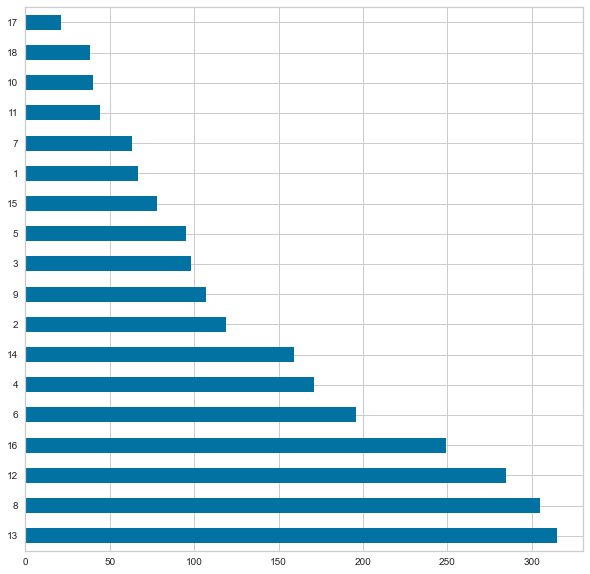

In [90]:
from matplotlib import pyplot as plt

f, ax = plt.subplots(1, 1, figsize = (10, 10))

df['Topic'].value_counts().plot(kind = 'barh') #horizontal frequency plot

In [197]:
(agg_topics.loc[2000,:]/agg_topics.loc[2000,:].sum())*100



Topic
1      0.0
2     25.0
3      0.0
4      0.0
5      0.0
6     25.0
7      0.0
8      0.0
9     12.5
10     0.0
11     0.0
12    12.5
13    25.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
Name: 2000, dtype: float64

In [91]:
from matplotlib import pyplot as plt
agg_topics = df.groupby([df.index.year,'Topic'])['Topic'].count().unstack().fillna(0)
agg_topics_1 = agg_topics.copy()

for i in list(df.index.year.unique()):
    print(i)
    sum_ = agg_topics_1.loc[i,:].sum()
    print(sum_)
    agg_topics_1.loc[i,:] = (agg_topics_1.loc[i,:]/sum_) * 100


2020
443.0
2019
491.0
2018
297.0
2017
195.0
2016
140.0
2015
124.0
2014
124.0
2013
88.0
2012
73.0
2011
75.0
2010
57.0
2009
62.0
2008
48.0
2007
40.0
2006
29.0
2005
43.0
2004
21.0
2003
18.0
2002
21.0
2001
11.0
2000
8.0
1999
7.0
1998
6.0
1997
8.0
1996
9.0
1995
4.0
1990
1.0
1989
1.0
1985
1.0
1994
2.0
1993
2.0
1983
1.0


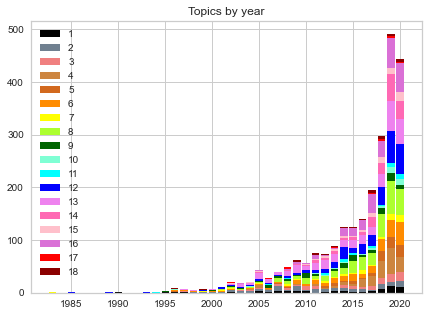

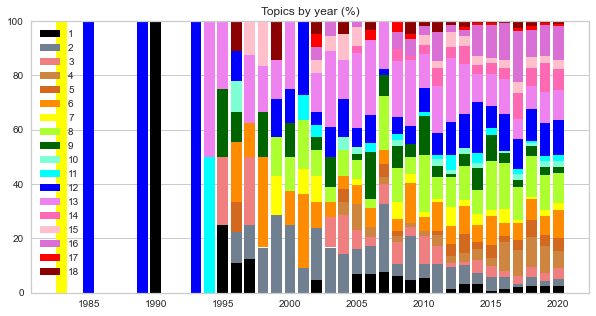

In [107]:


fig, ax = plt.subplots()


fig.set_figwidth(7)
fig.set_figheight(5)
colors = ['black', 'slategray', 'lightcoral','peru','chocolate','darkorange',
          'yellow','greenyellow','darkgreen','aquamarine','cyan',
         'blue', 'violet','hotpink','pink','orchid','red','darkred']
bottom = np.zeros(len(agg_topics))

for i, col in enumerate(agg_topics.columns):
  ax.bar(agg_topics.index, agg_topics[col], bottom=bottom, label=col,
         color=colors[i])
  bottom += np.array(agg_topics[col])

ax.set_title('Topics by year')
ax.legend()


fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(5)

colors = ['black', 'slategray', 'lightcoral','peru','chocolate','darkorange',
          'yellow','greenyellow','darkgreen','aquamarine','cyan',
         'blue', 'violet','hotpink','pink','orchid','red','darkred']
bottom = np.zeros(len(agg_topics_1))

for i, col in enumerate(agg_topics_1.columns):
  ax.bar(agg_topics_1.index, agg_topics_1[col], bottom=bottom, label=col,
         color=colors[i])
  bottom += np.array(agg_topics_1[col])

ax.set_title('Topics by year (%)')
ax.legend()

In [108]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
import os

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+ 'Final')

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, bi_corpus, dictionary2)
    with open(LDAvis_data_filepath,'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ 'Final' + '.html')

In [109]:
pyLDAvis.gensim_models.prepare(lda_model, bi_corpus, dictionary2)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12    -0.123950 -0.006179       1        1  10.940811
7     -0.119195 -0.073186       2        1  10.004043
11     0.107060  0.059019       3        1   9.407584
15    -0.012541  0.098807       4        1   9.048313
5      0.089004 -0.050536       5        1   7.825795
3     -0.077004  0.114700       6        1   6.362719
13     0.145085 -0.011557       7        1   5.914561
4     -0.057272  0.053850       8        1   5.258369
8     -0.063849 -0.005783       9        1   4.941531
1     -0.087409 -0.128969      10        1   4.870487
2      0.001223  0.015185      11        1   4.690026
14    -0.042757  0.061399      12        1   3.913542
0      0.047638 -0.099654      13        1   3.901976
6      0.063313  0.023902      14        1   3.198826
9      0.030563 -0.040185      15        1   2.666213
10     0.068605 -0.019233      16        1   2.607880
17     0.005349 -0.002329      17        1   2.473906
16     0.026138  0.010751      18        1   1.973419, topic_info=             Term         Freq        Total Category  logprob  loglift
85          model  2824.000000  2824.000000  Default  30.0000  30.0000
90        product  1180.000000  1180.000000  Default  29.0000  29.0000
1356       energy   570.000000   570.000000  Default  28.0000  28.0000
295        market   721.000000   721.000000  Default  27.0000  27.0000
240    technology   922.000000   922.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
6     application    17.387248   821.989941  Topic18  -5.4279   0.0694
584       discuss    13.322338   243.228678  Topic18  -5.6942   1.0208
130         focus    13.461935   307.155845  Topic18  -5.6838   0.7979
295        market    13.707787   721.131649  Topic18  -5.6657  -0.0375
288          high    13.327787   728.853109  Topic18  -5.6938  -0.0762

[949 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
401       1  0.074589  academic
401       2  0.014918  academic
401       3  0.119342  academic
401       4  0.029835  academic
401       5  0.208848  academic
...     ...       ...       ...
400      14  0.260340      year
400      15  0.010414      year
400      16  0.005207      year
400      17  0.005207      year
400      18  0.062482      year

[11754 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 8, 12, 16, 6, 4, 14, 5, 9, 2, 3, 15, 1, 7, 10, 11, 18, 17])

In [75]:
from collections import Counter

Counter(df.coverDate).keys()

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


dict_keys([Timestamp('2021-06-01 00:00:00'), Timestamp('2021-05-01 00:00:00'), Timestamp('2021-04-15 00:00:00'), Timestamp('2021-04-09 00:00:00'), Timestamp('2021-04-01 00:00:00'), Timestamp('2021-03-15 00:00:00'), Timestamp('2021-03-01 00:00:00'), Timestamp('2021-02-20 00:00:00'), Timestamp('2021-02-08 00:00:00'), Timestamp('2021-02-02 00:00:00'), Timestamp('2021-02-01 00:00:00'), Timestamp('2021-01-27 00:00:00'), Timestamp('2021-01-12 00:00:00'), Timestamp('2021-01-09 00:00:00'), Timestamp('2021-01-08 00:00:00'), Timestamp('2021-01-01 00:00:00'), Timestamp('2020-12-30 00:00:00'), Timestamp('2020-12-24 00:00:00'), Timestamp('2020-12-09 00:00:00'), Timestamp('2020-12-01 00:00:00'), Timestamp('2020-11-04 00:00:00'), Timestamp('2020-11-01 00:00:00'), Timestamp('2020-10-25 00:00:00'), Timestamp('2020-10-01 00:00:00'), Timestamp('2020-09-15 00:00:00'), Timestamp('2020-09-12 00:00:00'), Timestamp('2020-09-01 00:00:00'), Timestamp('2020-08-31 00:00:00'), Timestamp('2020-08-14 00:00:00'), Tim

In [76]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
import os

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/lda_'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, bi_corpus, dictionary2)
    with open(LDAvis_data_filepath,'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './results/lda_'+str(num_topics) + '.html')

C:\Users\marco\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Logistic Regression - Still need to add the sentiments

### X: Topic distribution per corpus, year, Sentiment, author publication score, first author's university rank, 

### y: citation number

### Things to do
* k-cv to choose the optimal topic numbers
* bigram
* interaction term

### Results

We see that a normal logistic model performs the best in terms of f1 score

* We can try other diagnostics.

### logistic regression (bigram)

In [35]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
import numpy as np

df.coverDate = df.coverDate.astype(str).str[0:4].astype(int)

X = np.column_stack([train_vecs, df.coverDate, df[0]])
y = np.array(df.citedby_count)
y[y<=np.median(y)] = 0
y[y>np.median(y)] = 1

#import warnings
#warnings.filterwarnings('ignore')

kf = KFold(10, shuffle = True, random_state = 42)

lr_score , lrsgd_score, svcsgd_score, cv_lr_f1, cv_lrsgd_f1, cv_svcsgd_f1, = [], [], [], [], [], []

for train_ind, val_ind in kf.split(X,y):
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]
    scaler = StandardScaler()
    X_train_scale = scaler.fit_transform(X_train)
    X_val_scale = scaler.transform(X_val)
    
    lr = LogisticRegression(
        class_weight = 'balanced',
        solver = 'saga',
        fit_intercept = True,
        max_iter = 10000, 
        C = 0.8
    ).fit(X_train_scale, y_train)
    
    
    y_pred = lr.predict(X_val_scale)
    cv_lr_f1.append(f1_score(y_val, y_pred, average='binary'))
    lr_score.append(lr.score(X_val_scale, y_val))

    sgd = SGDClassifier(
        max_iter=10000,
        tol=1e-3,
        loss='log',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd.predict(X_val_scale)
    cv_lrsgd_f1.append(f1_score(y_val, y_pred, average='binary'))
    lrsgd_score.append(sgd.score(X_val_scale, y_val))
    # print(lrsgd_score)
    
    # SGD Modified Huber
    sgd_huber = SGDClassifier(
        max_iter=10000,
        tol=1e-3,
        alpha=20,
        loss='modified_huber',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
                       
    y_pred = sgd_huber.predict(X_val_scale)
    cv_svcsgd_f1.append(f1_score(y_val, y_pred, average='binary'))
    svcsgd_score.append(sgd_huber.score(X_val_scale, y_val))

print(f'Logistic Regression Val f1: {np.mean(cv_lr_f1):.3f} +- {np.std(cv_lr_f1):.3f}')
print(f'Logisitic Regression SGD Val f1: {np.mean(cv_lrsgd_f1):.3f} +- {np.std(cv_lrsgd_f1):.3f}')
print(f'SVM Huber Val f1: {np.mean(cv_svcsgd_f1):.3f} +- {np.std(cv_svcsgd_f1):.3f}')
print(f'Logistic Regression Accuracy:{np.mean(lr_score)}')
print(f'Logistic Regression SGD Accuracy:{np.mean(lrsgd_score)}')
print(f'SVM Huber Accuracy:{np.mean(svcsgd_score)}')

Logistic Regression Val f1: 0.601 +- 0.031
Logisitic Regression SGD Val f1: 0.559 +- 0.041
SVM Huber Val f1: 0.125 +- 0.251
Logistic Regression Accuracy:0.6424489795918367
Logistic Regression SGD Accuracy:0.5681632653061224
SVM Huber Accuracy:0.49877551020408156


In [33]:
print(sgd.coef_, sgd.intercept_)
print(lr.coef_, lr.intercept_)

[[-0.36964821 -0.33621369  0.14156993  0.22308171  0.03660439 -0.31416487
   0.06284001  0.19066975 -0.16876469  0.04190189  0.10207071 -0.34135542
  -0.2012065  -0.04883825  0.40112894  0.33116388 -0.02767586  0.58547096
  -0.95567753 -0.70927064]] [-0.33950162]
[[-0.02627956 -0.02885786 -0.10398126  0.08857935 -0.0067288  -0.15825496
  -0.00283507  0.13435669 -0.02970919 -0.09324704 -0.05616325 -0.05763321
   0.00510408  0.05425183  0.03893933  0.11684524 -0.103387   -0.0171465
  -0.72078793 -0.0124328 ]] [0.01566072]


# Word Embeddings

### Loading the pre-trained Google's word2vec model
How to make it work?
- Dowload Google's trained Word2Vec model at: https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
- unzip the .gz file

In [2]:
import gensim
# Load Google's pre-trained Word2Vec model.
#model = gensim.models.KeyedVectors.load_word2vec_format(r'C:\Users\marco\Desktop\NLP_local\notebook\data\GoogleNews-vectors-negative300.bin', binary=True)
model = gensim.models.KeyedVectors.load_word2vec_format(r'C:\Users\USER\OneDrive\Documents\Python\NLP\GoogleNews-vectors-negative300.bin', binary=True)

C:\Users\USER\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


### Creating a sentence embedding for each abstract

In the cell below, we create the embedding for each word of the abstract using Google's word2vec model. Then we average all these vectors to obtain a unique abstract (sentence) embedding. This is repeated for all the abstracts in corpus1. Notice that corpus1 was created [here](#Creating-corpus1-and-corpus2).

In [36]:
# Create an empty list used to store the abstract embedding
list_word2vec_vector = []
# Create an empty list to store the words that our model does not recognise
list_missing_word = []

# Loop all the abstracts in corpus1
for i in range(len(corpus1)):
    # Creating an empty list used to store the word embeddings of each word in the abstract
    word_matrix = []
    # Loop all the words in corpus1[i]
    for word in corpus1[i]:
        # Try/except is used here because if a word is not recognised by the model, an exception is raised
        try:
            # Embedding the word using our model
            word_vector = model[word]
            # Appending the embedding to the list of embeddings
            word_matrix.append(word_vector)
        except Exception as e:
            # If the word is not recognised, it is stored in the list below
            list_missing_word.append(word)
    # Take the average over all the word embeddings of an abstract
    sentence_embedding = np.average(np.asarray(word_matrix), axis = 0)
    # Append the average vector to the list below
    list_word2vec_vector.append(sentence_embedding)

In [18]:
# Checking the words that are not recognised by the model
print(set(list_missing_word))
print(np.shape(word_vector)) # Check size of a word vector (must be 300)
print(np.shape(word_matrix)) # Check size word matrix (must be equal to num of words in abstract minus the words that are not recognised)
print(len(list_word2vec_vector[0])) # Check size of abstract vector (must be 300)

{'carehnd', 'cyproheptadine', 'uncertaintie', 'rtcore', 'igs', 'empow', 'awi', 'recolibry', 'vsi', 'benchmarke', 'pointwise', 'chellenge', 'masco', 'complementar', 'bilinear', 'datafest', 'vickrey', 'hto', 'advancetown', 'glm', 'hoey', 'hmds', 'smd', 'mpfc', 'stitchfix', 'alexnet', 'drsa', 'enrol', 'cliquenet', 'dscmr', 'rmsep', 'referencesal', 'denoising', 'weibull', 'ibcf', 'rmdl', 'smk', 'romela', 'cursa', 'cdoanalytic', 'emss', 'prade', 'ocx', 'wsns', 'efficiencie', 'wherewip', 'vrinmotion', 'paralleldot', 'dpace', 'imfs', 'unsaturate', 'dehaze', 'toyoda', 'mdas', 'sinica', 'menudriven', 'parís', 'logitboost', 'lgcm', 'errortolerant', 'mapeof', 'technologised', 'clv', 'lowcorrelation', 'conative', 'vectorize', 'bulgaria', 'metaheurstic', 'isophote', 'mcp', 'occipito', 'icic', 'daechung', 'heterarchy', 'papua', 'sigmar', 'eference', 'sendirian', 'stratford', 'unscaleable', 'ixma', 'mllib', 'valncia', 'krogh', 'multitype', 'hamid', 'possibilitie', 'neuroethic', 'uncurate', 'lra', 'pr

### Penalized Logistic model to predict number of citations with abstract embeddings

Run a (penalized) logistic regression to see if the asbtract embeddings using Google's word2vec model have any predictive power of the number of citations.
The y variable used is the same defined [here](#logistic-regression-(unigram)). The x variables are the 300 values of the asbtract embeddings. 

In [37]:
# Check that y vector has the same order of df
print(y[:10])
print(df.citedby_count[:10])
# check that corpus1 has the same order of df
print(df.description[:2])
print(corpus1[:2])

[0 0 0 0 0 0 0 0 0 0]
coverDate
2020-06-01    0
2020-06-01    5
2020-06-01    6
2020-06-01    1
2020-06-01    0
2020-06-01    0
2020-06-01    6
2020-06-01    0
2020-05-15    0
2020-05-07    3
Name: citedby_count, dtype: int64
coverDate
2020-06-01    there are a growing number of medical applicat...
2020-06-01    the elicitation and monitoring of customer nee...
Name: description, dtype: object
[['grow', 'number', 'medical', 'application', 'use', 'artificial', 'intelligence', 'ai', 'machine', 'learn', 'currently', 'urology', 'concrete', 'tool', 'ongoing', 'project', 'quickly', 'applicable', 'activity', 'prostatic', 'oncology', 'recent', 'regulatory', 'authorization', 'use', 'medical', 'field', 'testify', 'fact', 'wave', 'practice', 'analysis', 'innovation', 'study', 'characteristic', 'origin', 'regulatory', 'validation', 'provide', 'information', 'perspective', 'research', 'development', 'ai', 'specialty', 'contribution', 'ai', 'divide', 'category', 'assistance', 'ai', 'substitution', '

In [51]:
# Setting X as the predictior of the model (i.e. the abstract sentence embedding)
X = np.column_stack([list_word2vec_vector, df[0], df.coverDate])

# Set K-Folds cross-validator
kf = KFold(10, shuffle = True, random_state = 42)

# Empty lists to store the mean accuracy (lr_score) and balanced F-score (cv_lr_f1)
lr_score , cv_lr_f1= [], []

for train_ind, val_ind in kf.split(X,y):
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]
    
    # Notice that I am NOT normalizing the data <<---
    
    # Set logistic regression model
    lr = LogisticRegression(
        class_weight = 'balanced',
        solver = 'saga',
        fit_intercept = True,
        max_iter = 10000, 
        C = 3 # Penalization parameter (potentially to be tuned)
    ).fit(X_train, y_train)
    
    # Computing mean accuracy and balanced F-score
    y_pred = lr.predict(X_val)
    cv_lr_f1.append(f1_score(y_val, y_pred, average='binary'))
    lr_score.append(lr.score(X_val, y_val))

In [49]:
print(f'Logistic Regression Val f1: {np.mean(cv_lr_f1):.3f} +- {np.std(cv_lr_f1):.3f}')
print(f'Logistic Regression Accuracy:{np.mean(lr_score)}')
print(sum(sum(lr.coef_>0.1))) # Check number of coefficient bigger than 0.1

Logistic Regression Val f1: 0.571 +- 0.030
Logistic Regression Accuracy:0.573877551020408
137
